# Residential Energy Applicance Classification

* **Author Names**: Dahye Kim, Armin Berger
* **Last Edited**: 30 May 2021 

This program predict the usage of five different appliances from a household using the electric load recorded each minute for 270 days. Since the eletric load of each minute is a timeseries data, extra timeseries features are provided for predicting the usage of each appliances. Five appliances for prediction - ``ac``, ``oven``, ``ev``, ``wash``, and ``dryer`` are all binary targets, representing whether an appliance is in use. Two to three different models are built for predicting each target. 

### Table of Contents: 
* [Part 1. Data Inspection](#sec_1)  
    * [1.1 Load in the data](#sec_1.1)
    * [1.2 Inspect the Targets](#sec_2.2)
    * [1.3 Exploratory Data Analysis](#sec_1.3)
    * [1.4 Features to Each Target Class](#sec_1.4)  
      
      
* [Part 2. Model Development:`ac`](#sec_2)
    * [2.1 Feature Engineering](#sec_2.1)
    * [2.2 Model 1: Decision Tree](#sec_2.2)
        * [2.2.1 Cross Validation for Hyperparameter Tuning](#sec_2.2.1)
        * [2.2.2 Model Fitting and Result Interpretation](#sec_2.2.2)
    * [2.3 Model 2: Linear Discriminative Analysis (ADA)](#sec_2.3)
        * [2.3.1 Cross Validation for Hyperparameter Tuning](#sec_2.3.1)
        * [2.3.2 Model Fitting and Result Interpretation](#sec_2.3.2)
    * [2.4 Select the Best Model](#sec_2.4)  
      
        
* [Part 3. Model Development:`oven`](#sec_3)
    * [3.1 Feature Engineering](#sec_3.1)
    * [3.2 Model 1: Decision Tree](#sec_3.2)
        * [3.2.1 Cross Validation for Hyperparameter Tuning](#sec_3.2.1)
        * [3.2.2 Model Fitting and Result Interpretation](#sec_3.2.2)
    * [3.3 Extract Minimal Timeseries Features with `tsfresh`](#_sec3.3)
    * [3.4 Model 2: Random Forest with TS Features](#sec_3.4)
        * [3.4.1 Cross Validation for Hyperparameter Tuning](#sec_3.4.1)
        * [3.4.2 Model Fitting and Result Interpretation](#sec_3.4.2)
    * [3.5 Model 3: AdaBoost with TS Features](#sec_3.5)
        * [3.5.1 Cross Validation for Hyperparameter Tuning](#sec_3.5.1)
        * [3.5.2 Model Fitting and Result Interpretation](#sec_3.5.2)
    * [3.6 Select the Best Model](#sec_3.6)
      
      
* [Part 4. Model Development:`dryer`](#sec_4)
    * [4.1 Feature Engineering](#sec_4.1)
    * [4.2 Model 1: Decision Tree](#sec_4.2)
        * [4.2.1 Cross Validation for Hyperparameter Tuning](#sec_4.2.1)
        * [4.2.2 Model Fitting and Result Interpretation](#sec_4.2.2)
    * [4.3 Extract Selected Timeseries Features using `tsfresh`](#sec_4.3)
    * [4.4 Model 2: Random Forest with TS Features](#sec_4.4)
        * [4.4.1 Cross Validation for Hyperparameter Tuning](#sec_4.4.1)
        * [4.4.2 Model Fitting and Result Interpretation](#sec_4.4.2)
    * [4.5 Model 3: AdaBoost with TS Features](#sec_4.5)
        * [4.5.1 Cross Validation for Hyperparameter Tuning](#sec_4.5.1)
        * [4.5.2 Model Fitting and Result Interpretation](#sec_4.5.2)
    * [4.6 Select the Best Model](#sec_4.6)
      
        
* [Part 5. Model Development:`wash`](#sec_5)
    * [5.1 Feature Engineering](#sec_5.1)
    * [5.2 Model 1: Decision Tree](#sec_5.2)
        * [5.2.1 Cross Validation for Hyperparameter Tuning](#sec_5.2.1)
        * [5.2.2 Model Fitting and Result Interpretation](#sec_5.2.2)
    * [5.3 Extract Selected Timeseries Features using `tsfresh`](#sec_5.3)
    * [5.4 Model 2: Random Forest with TS Features](#sec_5.4)
        * [5.4.1 Cross Validation for Hyperparameter Tuning](#sec_5.4.1)
        * [5.4.2 Model Fitting and Result Interpretation](#sec_5.4.2)
    * [5.5 Model 3: Gradient Boosting Classifier with TS Features](#sec_5.5)
        * [5.5.1 Cross Validation for Hyperparameter Tuning](#sec_5.5.1)
        * [5.5.2 Model Fitting and Result Interpretation](#sec_5.5.2)
    * [5.6 Select the Best Model](#sec_5.6)
  
  
* [Part 6. Model Development:`ev`](#sec_6)
    * [6.1 Feature Engineering](#sec_6.1)
    * [6.2 Model 1: Decision Tree](#sec_6.2)
        * [6.2.1 Cross Validation for Hyperparameter Tuning](#sec_6.2.1)
        * [6.2.2 Model Fitting and Result Interpretation](#sec_6.2.2)
    * [6.3 Model 2: Random Forest](#sec_6.3)
        * [6.3.1 Cross Validation for Hyperparameter Tuning](#sec_6.3.1)
        * [6.3.2 Model Fitting and Result Interpretation](#sec_6.3.2)
    * [6.4 Model 4: KNN Classifier](#sec_6.4)
        * [6.4.1 Cross Validation for Hyperparameter Tuning](#sec_6.4.1)
        * [6.4.2 Model Fitting and Result Interpretation](#sec_6.4.2)
    * [6.5 Select the Best Model](#sec_6.5)
  
  
* [Part 7. Predict Targets with Test Datasets](#sec_7)
    * [7.1 Inspect the Test set](#sec_7.1)
    * [7.2 Feature Engineering](#sec_7.2)
    * [7.3 Append Prediction to the Final Dataframe](#sec_7.3)

In [1]:
import pandas as pd 
import numpy as np 
import sklearn
import time

from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from string import ascii_letters
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh import extract_features as ef
from tsfresh import select_features as sf 

In [2]:
import rpy2
%load_ext rpy2.ipython

# Part 1. Data Inspection<a class="anchor" id="sec_1"></a> 

## 1.1. Load in the Data<a class="anchor" id="sec_1.1"></a>

In [3]:
df = pd.read_csv('train_data_withlabels.csv').drop('Unnamed: 0', axis = 1)

In [4]:
targets = ['ac', 'oven', 'ev', 'dryer', 'wash']
allFeatures = [i for i in df.columns if i not in targets and i != 'Unnamed: 0']
numericFeatures = [i for i in allFeatures if i !='dayofweek']

In [5]:
df = pd.concat([df.drop('dayofweek', axis = 1),\
               pd.get_dummies(df.dayofweek)], axis = 1)

## 1.2 Inspect the Targets<a class="anchor" id="sec_1.2"></a>

In [6]:
targets_df = df[targets].astype(str)
# create the copy of the dataframe, convert the variables to strings 

In [7]:
'''
TargetStats

Input: 
targetName - name of the target for inspection 

The function first identify the target column with target == 1. Then 
all targets are added up in order to check how many appliances are 
turned on simultaneously given that the input targetName is on. 

The function returns the number of observations where other classes are 
1 given that the input target is 1. The function then returns a dataframe 
with the count of each occasion, as well as each target's class 1 count.
'''
def targetStats(targetName):
    
    targets_temp = targets_df[targets_df[targetName] == '1'].astype(int)
    # only obtain the targetName == 1 rows, convert the variables into integers
    targets_binary_temp = targets_temp.apply(lambda x: x.ac+x.oven+x.ev+x.dryer+x.wash, axis = 1)
    # sum up all the targets == 1 given that the targetName == 1
    temp_counts = targets_binary_temp.value_counts()
    # count the frequency of all unique values 

    temp_counts_sum = temp_counts.tolist()+[sum(temp_counts)]
    # the counts when single and multiple targets are on simultaneously 
    temp_counts_standalone = temp_counts.tolist()[0]/targets_temp.shape[0]
    # proportion of only the input target is on in comparison 
    # multiple targets turned on simultaneously 
    temp_counts_sum = temp_counts_sum + [temp_counts_standalone]
    # total count of target == 1

    return pd.DataFrame({'Class 1 Counts': temp_counts_sum})

In [8]:
'''
TargetProportion 

Input: 
targetName - name of the target for inspection 

Similar to TargetStats, the TargetProportion returns the statistics on 
the occasion where other appliances are on given that targetName is on. 
However, this function returns the proportion of the target counts,
rather than the raw number itself. 
'''

def TargetProportion(targetName):
    
    targets_temp = targets_df[targets_df[targetName] == '1'].astype(int)
    # only obtain the targetName == 1 rows, convert the variables into integer
    targets_binary_temp = targets_temp.apply(lambda x: x.ac+x.oven+x.ev+x.dryer+x.wash, axis = 1)
    # sum up all the targets == 1 given that the targetName == 1
    temp_counts = targets_binary_temp.value_counts()
    # count the frequency of all unique values 
    temp_proportion = (temp_counts/targets_temp.shape[0]).tolist()+[1]
    # calculate the proportion of the target turned on itself only to 
    # other targets turned on simultaneously
    
    return pd.DataFrame({'Class 1 Proportion': temp_proportion})

In [9]:
targetCounts = pd.DataFrame(columns = targets, index = [*range(0,5)])
# create empty data frame for returned values from targetStats
for i in targets: 
    targetCounts[i] = targetStats(i)['Class 1 Counts']
    
targetCounts.loc[4, 'ev'] = targetCounts.loc[3,'ev']
targetCounts.loc[3, 'ev'] = 0
# shift the erronuous value in the 'ev' column
targetCounts.index = [*range(1,5)]+['Total']
# rename the index row for readability 
targetCounts.astype(int)
# convert all variables in the dataframe into integers

ac  oven    ev  dryer  wash
1       93595  3462  1801   9343  5232
2        7045  2264   453   3683  2405
3         533   204    81    524   290
4          26    26     0     26    26
Total  101199  5956  2335  13576  7953

In [10]:
targetProp = pd.DataFrame(columns = targets, index = [*range(0,5)])
# create empty data frame for returned values from targetProportion
for i in targets: 
    targetProp[i] = TargetProportion(i)['Class 1 Proportion']
    
targetProp.index = [*range(1,5)]+['Total']
targetProp.loc[4, 'ev'] = 0
# shift the erronuous value in the 'ev' column
targetProp.loc['Total','ev'] = 1
targetProp

ac      oven        ev     dryer      wash
1      0.924861  0.581263  0.771306  0.688200  0.657865
2      0.069615  0.380121  0.194004  0.271288  0.302402
3      0.005267  0.034251  0.034690  0.038598  0.036464
4      0.000257  0.004365  0.000000  0.001915  0.003269
Total  1.000000  1.000000  1.000000  1.000000  1.000000

Text(0.5, 0, 'Class Count Proportion')

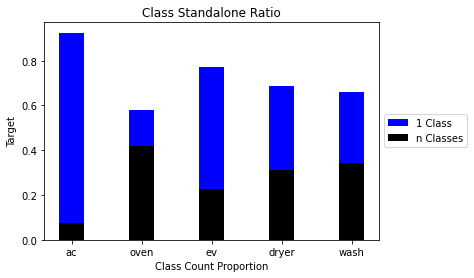

In [11]:
# create graph representation of targetProp
cols = ['blue', 'black']
labels = ['1 Class', 'n Classes']
width = 0.35

oneClass = targetProp.iloc[0,:]
# targets turned on by themselves 
n_Classes = targetProp.iloc[1,:] + targetProp.iloc[2,:] + targetProp.iloc[3,:]
# targets turned on with other targets simultaneously 

plt.bar(targets, oneClass, width, label = labels[0], color = cols[0])
plt.bar(targets, n_Classes, width, label = labels[1], color = cols[1])

plt.legend(bbox_to_anchor=(1, 0.6))
plt.title('Class Standalone Ratio')
plt.ylabel('Target')
plt.xlabel('Class Count Proportion')

# 1.3 Exploratory Data Analysis (EDA)<a class="anchor" id="sec_1.3"></a>

In [12]:
df.describe()

load             ac             ev           oven  \
count  417720.000000  417720.000000  417720.000000  417720.000000   
mean        2.184664       0.242265       0.005590       0.014258   
std         1.890565       0.428454       0.074556       0.118554   
min         0.298000       0.000000       0.000000       0.000000   
25%         0.807000       0.000000       0.000000       0.000000   
50%         1.279000       0.000000       0.000000       0.000000   
75%         3.358000       0.000000       0.000000       0.000000   
max        11.794000       1.000000       1.000000       1.000000   

                wash          dryer      hourofday           dif  \
count  417720.000000  417720.000000  417720.000000  4.177200e+05   
mean        0.019039       0.032500      11.484487 -7.038207e-07   
std         0.136662       0.177325       6.920358  5.309284e-01   
min         0.000000       0.000000       0.000000 -7.970000e+00   
25%         0.000000       0.000000       5.000000 -1.100000e-02   
50%         0.000000       0.000000      11.000000 -1.000000e-03   
75%         0.000000       0.000000      17.000000  8.000000e-03   
max         1.000000       1.000000      23.000000  7.619000e+00   

              absdif            max  ...        entropy      nonlinear  \
count  417720.000000  417720.000000  ...  417720.000000  417720.000000   
mean        0.159578       3.977086  ...       0.707766       1.468806   
std         0.506379       2.131094  ...       0.094367       2.610744   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.002000       1.786000  ...       0.645582       0.271757   
50%         0.010000       4.652000  ...       0.676446       0.698592   
75%         0.043000       5.446000  ...       0.740986       1.598501   
max         7.970000      11.794000  ...       0.999987      54.611740   

               hurst            Fri            Mon            Sat  \
count  417720.000000  417720.000000  417720.000000  417720.000000   
mean        0.972744       0.139471       0.147084       0.139041   
std         0.065439       0.346438       0.354190       0.345989   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.987936       0.000000       0.000000       0.000000   
50%         0.992059       0.000000       0.000000       0.000000   
75%         0.993138       0.000000       0.000000       0.000000   
max         0.996802       1.000000       1.000000       1.000000   

                 Sun            Thu            Tue            Wed  
count  417720.000000  417720.000000  417720.000000  417720.000000  
mean        0.143493       0.141339       0.144786       0.144786  
std         0.350576       0.348371       0.351885       0.351885  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 21 columns]

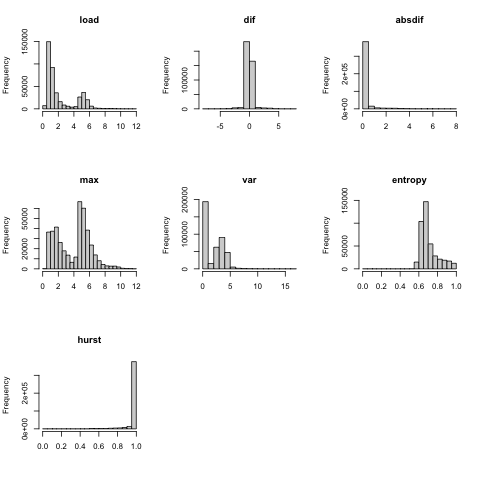

In [13]:
%%R
library(readr)
df <- read.csv('train_data_withlabels.csv')
target <- c('ac', 'oven', 'ev', 'dryer', 'wash')

par(mfrow = c(3,3))
for (i in c('load','dif','absdif','max','var','entropy','hurst')){
    hist(df[,i], main = i, xlab = '')
}

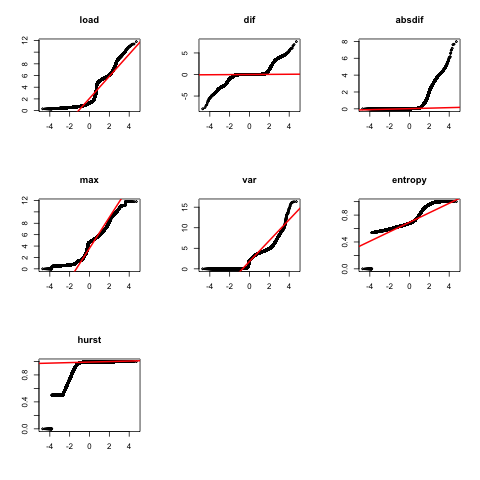

In [14]:
%%R
par(mfrow = c(3,3))
for (i in c('load','dif','absdif','max','var','entropy','hurst')){
    qqnorm(df[, i], ylab = '', xlab = '', main = i, cex = 0.5)
    qqline(df[, i], ylab = '', col = 'red', lwd = 2)
}

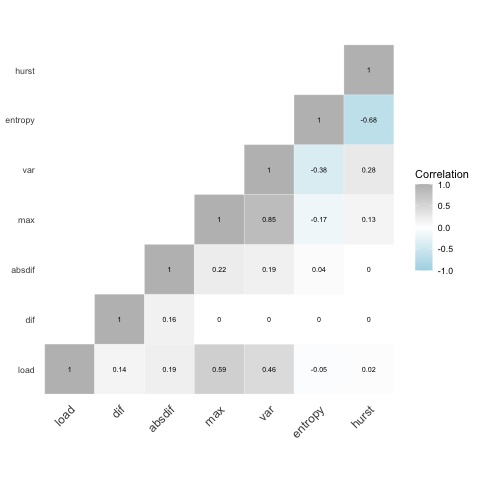

In [15]:
%%R
library(reshape2)
library(ggplot2)

numeric <- c('load','dif','absdif','max','var','entropy','hurst')
correlation <- cor(df[numeric])
# correlation matrix of all the featrues 
correlation[lower.tri(correlation)]<- NA
# lower triangle of the matrix to NA 
# the correlation matrix is diagonally symmetric
# removing repetitive correlations
correlation.lower <- melt(correlation, na.rm = T)

ggplot(data = correlation.lower, aes(Var2, Var1, fill = value))+
  geom_tile(color = 'white')+
  geom_text(aes(label = round(value,2)),color = 'black', size = 2.5)+
  scale_fill_gradient2(low = "lightblue", high = "grey", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Correlation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1),
    axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),)+
 coord_fixed()


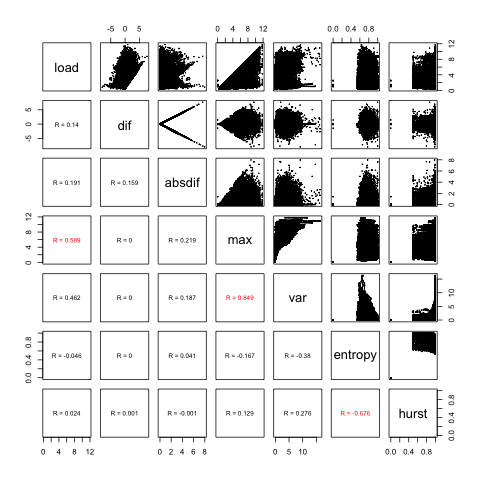

In [16]:
%%R
panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cor(x, y), digits=3)
    txt <- paste0('R = ',r)
    text(0.5,0.5, txt, cex = 0.8, 
         col = ifelse(r>0.5 | r< -0.5, 'red','black'))
}
# Customize upper panel
upper.panel<-function(x, y){
  points(x,y, cex =0.1)
}
# Create the plots
pairs(df[numeric], 
      lower.panel = panel.cor,
      upper.panel = upper.panel)

# This chunk of code is adapted from Scatter Plot Matrices - R Base Graphs - Easy Guides - Wiki - STHDA, n.d.
# http://www.sthda.com/english/wiki/scatter-plot-matrices-r-base-graphs

## 1.4. Features to Each Target Class<a class="anchor" id="sec_1.4"></a>

### Hourly Load - 0 vs. 1 for Each Target

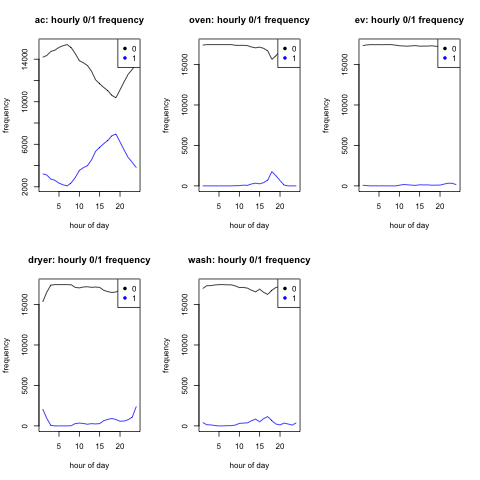

In [17]:
%%R
par(mfrow = c(2,3))
for(i in target){
    freq.table <- table(df$hourofday, df[,i])
    
    ymax <- max(freq.table[,1])
    ymin <- min(freq.table[,2])
    
    plot(freq.table[,1], type = 'l',
    xlab = 'hour of day', ylab = 'frequency', ylim = c(ymin, ymax),
    main = paste0(i,': hourly 0/1 frequency'))
    lines(freq.table[,2], col = 'blue')
    legend('topright',legend = c('0', '1'), col = c('black', 'blue'), pch = 16)
}

### Weekly Load - 0 vs. 1 for Each Target

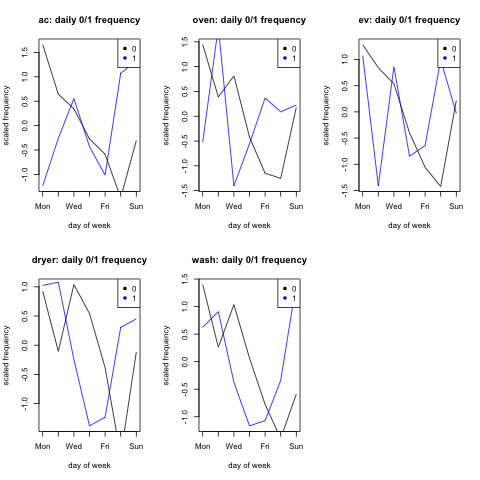

In [18]:
%%R
df$dayofweek <- factor(df$dayofweek, ordered = T,
                         levels = c('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))

par(mfrow = c(2,3))
for(i in target){
    freq.table <- scale(table(df$dayofweek, df[,i]))
    
    ymax <- max(freq.table[,1])
    ymin <- min(freq.table[,2])
    
    plot(freq.table[,1], type = 'l',xaxt='n',
    xlab = 'day of week', ylab = 'scaled frequency', ylim = c(ymin, ymax),
    main = paste0(i,': daily 0/1 frequency'))
    lines(freq.table[,2], col = 'blue')
    legend('topright',legend = c('0', '1'), col = c('black', 'blue'), pch = 16)
    axis(side = 1, at = 1:7,labels = levels(df$dayofweek))
}

In [19]:
%%R
linegraph_scaledFeatures <- function(varName, scaled = F){
for(i in target){
    temp <- df[,c(varName, 'X', i)]
    # timestamp of the whole data frame, x-axis of the graph
    pos <- temp[temp[,i] == 1,]
    # the observations where target == 1
    neg <- temp[temp[,i] == 0,]
    # the observations where target == 0
    
    if(scaled == T){
        # if scaled == True
    y_neg <- scale(neg[,varName])
    y_pos <- scale(pos[,varName])
        # scale the feature input with standard scaler 
    }else{
        # if scaled == False
    y_neg <- neg[,varName]
    y_pos <- pos[,varName]
        # use the original values as the y values 
    }
    
    x_neg <- neg[,'X']
    x_pos <- pos[,'X']
    # x-axis of both target == 1 and target == 0
    
    plot(y_neg~x_neg, 
               type = 'l', col = 'blue', main = i, 
         xlab = 'timestamp')
    lines(y_pos~x_pos)
    # plot the line graph of the feature moving along the timestamp 
    # differentiated by the target class
}
}

### Load Every Minute - 0 vs. 1 for Each Target

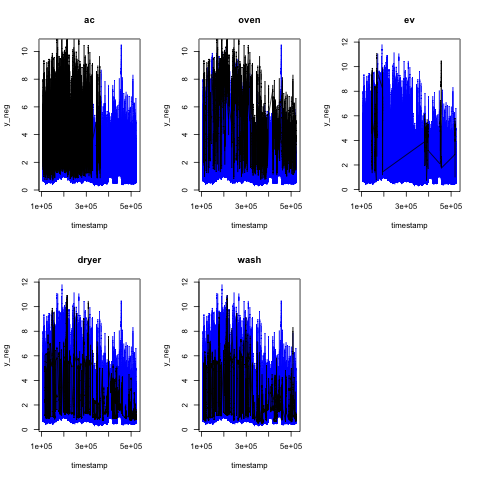

In [20]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('load', scaled = F)

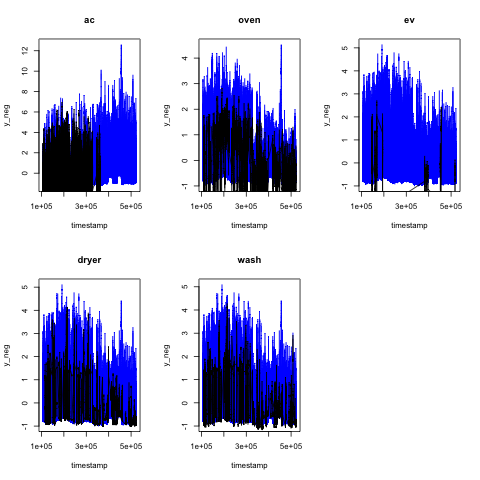

In [21]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('load', scaled = T)

### Nonlinear Every Minute - 0 vs. 1 for Each Target

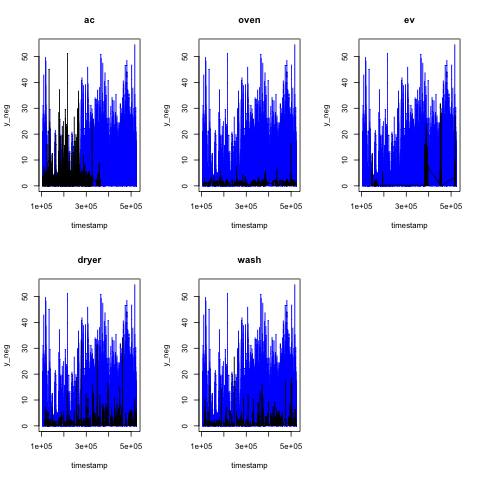

In [22]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('nonlinear', scaled = F)

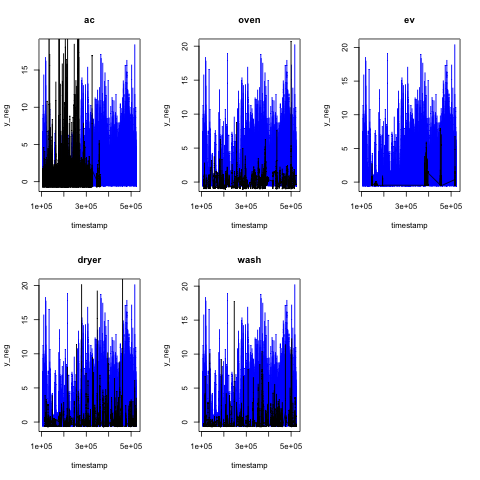

In [23]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('nonlinear', scaled = T)

### Hurst Every Minute - 0 vs. 1 for Each Target

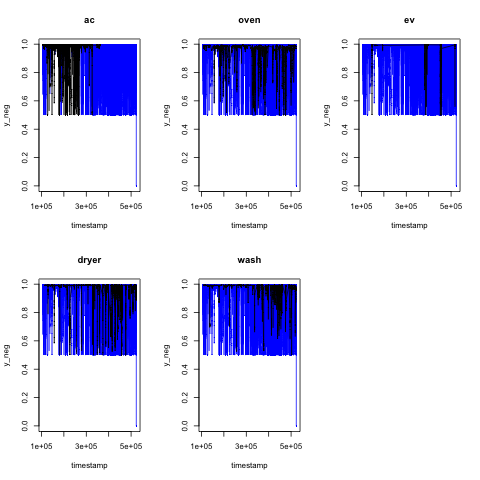

In [24]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('hurst', scaled = F)

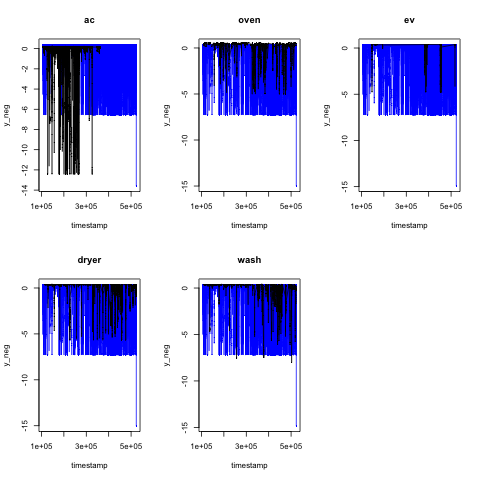

In [25]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('hurst', scaled = T)

### Dif Every Minute - 0 vs. 1 for Each Target

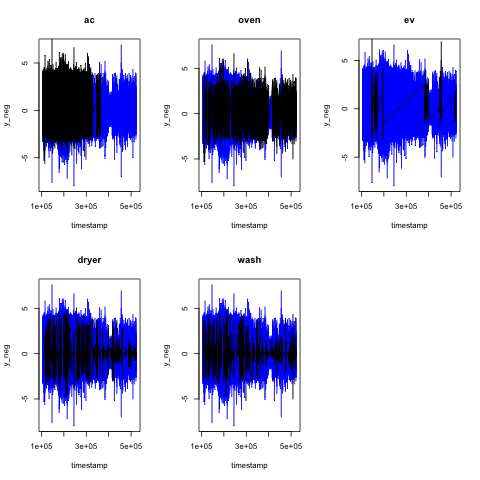

In [26]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('dif', scaled = F)

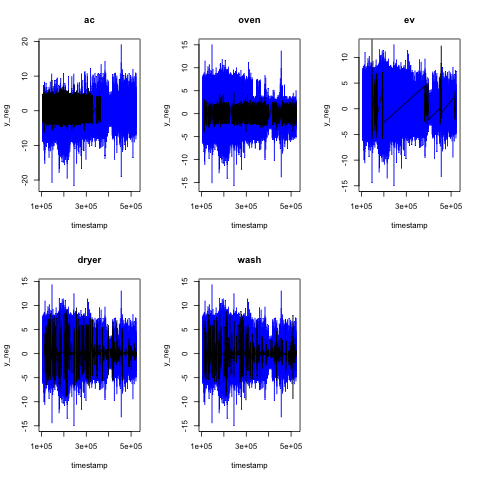

In [27]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('dif', scaled = T)

### AbsDif Every Minute - 0 vs. 1 for Each Target

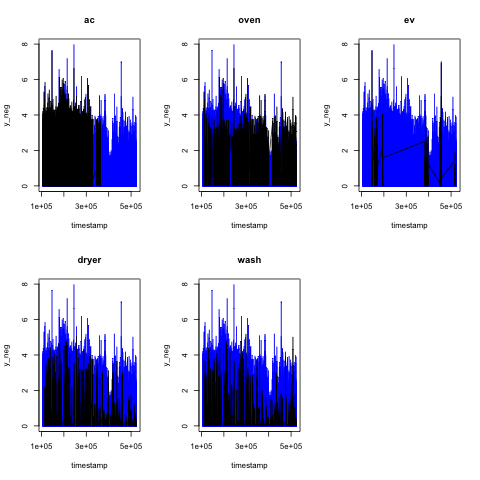

In [28]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('absdif', scaled = F)

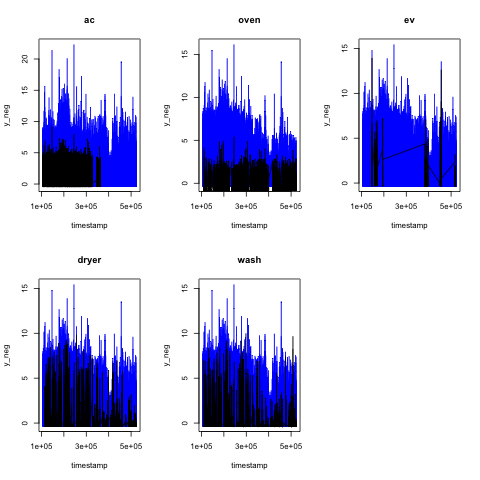

In [29]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('absdif', scaled = T)

### Max Every Minute - 0 vs. 1 for Each Target

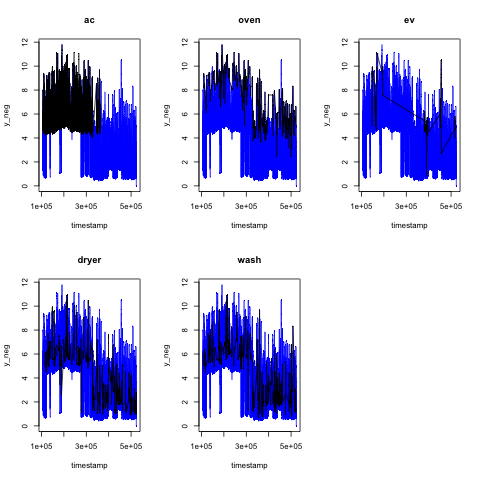

In [30]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('max', scaled = F)

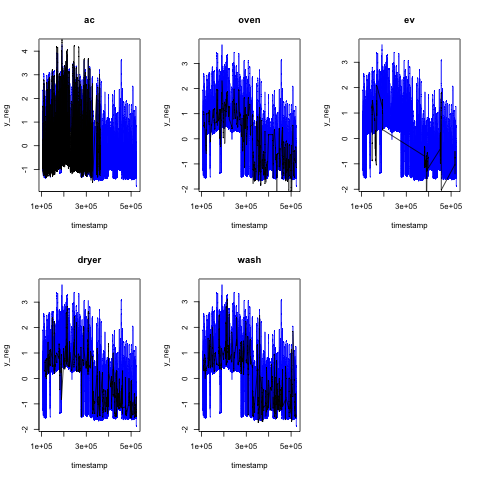

In [31]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('max', scaled = T)

### Var Every Minute - 0 vs. 1 for Each Target

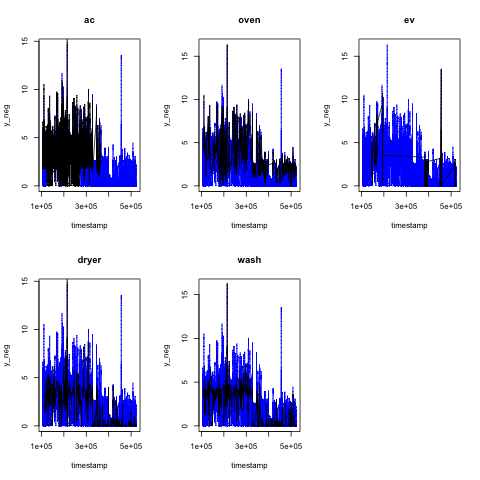

In [32]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('var', scaled = F)

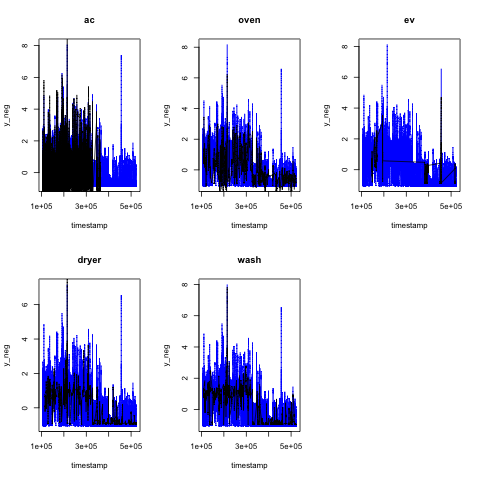

In [33]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('var', scaled = T)

### Entropy Every Minute - 0 vs. 1 for Each Target

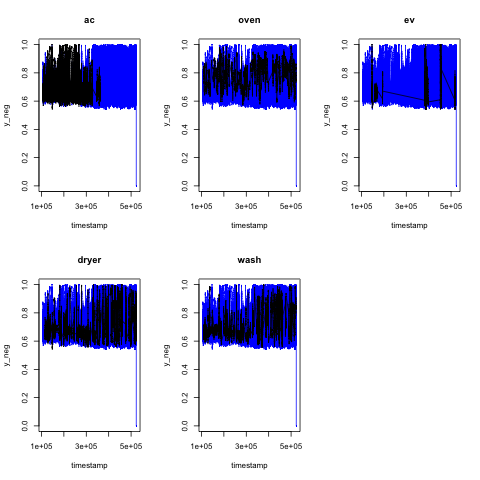

In [34]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('entropy', scaled = F)

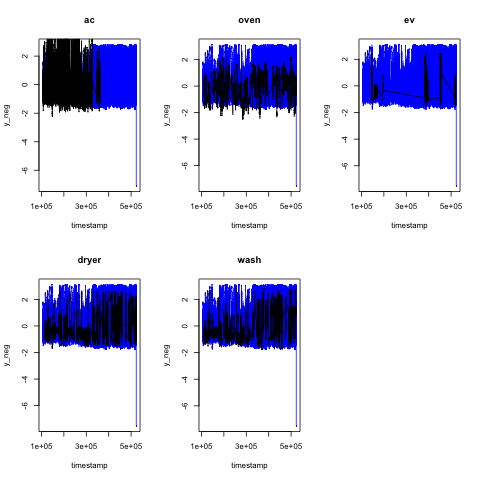

In [35]:
%%R
par(mfrow = c(2,3))
linegraph_scaledFeatures('entropy', scaled = T)

To predict each binary targets with effective models, the following procedures are performed: 

1. Select features using the results from EDA  
2. Feature Engineering: 
    * Scale features using `StandardScaler` if necessary 
    * Extract more features using `tsfresh` and `load` attribute if the model performance is not ideal with given predictors 
3. Split the dataset into train-validation sets with the ratio of 6:4 after random shuffling 
4. Select the statistical model algorithm and obtain the best hyperparametres for each model using 3-fold cross validation on train sets
    * The hyperparameter candidates are tested using `GridSearchCV`
    * The best hyperparameters are selected using the best F-1 scores
5. With the best parameters obtained, train the models with the entire trainset 
6. Explore the relationships or significance of each predictor for predicting the target. 
7. Predict the target with the model using validation set, evaluate the performance of the model 




# Part 2. Model Development:`ac`

* [2.1 Feature Engineering](#sec_2.1)
* [2.2 Model 1: Decision Tree](#sec_2.2)
    * [2.2.1 Cross Validation for Hyperparameter Tuning](#sec_2.2.1)
    * [2.2.2 Model Fitting and Result Interpretation](#sec_2.2.2)
* [2.3 Model 2: Linear Discriminative Analysis (ADA)](#sec_2.3)
    * [2.3.1 Cross Validation for Hyperparameter Tuning](#sec_2.3.1)
    * [2.3.2 Model Fitting and Result Interpretation](#sec_2.3.2)
* [2.4 Select the Best Model](#sec_2.4)  

For the target AC we have a lot of class 1 observations in comparison to other targets. Moreover, AC also had a high percentage of ‘standalone’ observations, observations that can solely be attributed to the use of one appliance. Based on these factors we expect good model performance. 

Based on the EDA done before and the trial-and-error model testing process we used the features **hourofday**, **dayofweek**, **load** to train the models for target AC. Moreover, using feature engineering we created the additional features **hurst scaled**, **dif scaled**, **var scaled**’, **absdif scaled**.

The models chosen for target AC are:

- Decision tree
- Linear Discriminative Analysis (LDA)

After cross validating the models to tune hyperparameters we trained all models on the full data set. We then compared the final model’s performance using 5-fold cross-validation.

## 2.1 Feature Engineering<a class="anchor" id="sec_2.1"></a>  

In [12]:
'''
StandardScaler_df 

Input: 
scalingFeatures - the features' names that need to be scaled
dataframe - the dataframe to concatenate the scaled features into 

Output: 
dataframe - the dataframe with both original and newly scaled features

The StandardScaler_df function transforms input features using StandardScaler() from sklearn. 
The features input is scaled to floating numbers ranging from -1 to 1. 
After scaling, the features are assigned with apt variable names and concatenated into the 
input data frame. 
The whole dataframe is returned by the function as an output 
'''

def StandardScaler_df(scalingFeatures, dataframe, df = df):
    
    standardScaler = preprocessing.StandardScaler()
    # initialise the scaler 
    
    for feature in scalingFeatures: 
    # for each feature
        feature_array = np.asarray(df[feature]).reshape(-1, 1)
        # convert the data frame into one-dimensional numpy array 
        dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)
        # fit and transform each feature with standard scaling 
        # add the scaled feature to ac dataset
        
    return dataframe

In [13]:
dayofweek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [14]:
ac = df[['ac', 'load','hourofday']+dayofweek]
# convert the categorical variable to series of binary attributes 
# concatenate the selected features, target, and converted attributes to a single dataframe

ac = StandardScaler_df(['hurst', 'dif', 'absdif', 'var'], ac)
# scale hurst, dif, absdif, and var with StandardScaler

<ipython-input-12-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)
<ipython-input-12-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)
<ipython-input-12-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [15]:
ac.head()

ac   load  hourofday  Mon  Tue  Wed  Thu  Fri  Sat  Sun  scaled_hurst  \
0   0  2.245          0    0    0    0    0    0    0    1      0.325913   
1   0  2.259          0    0    0    0    0    0    0    1      0.327174   
2   0  2.269          0    0    0    0    0    0    0    1      0.328183   
3   0  2.268          0    0    0    0    0    0    0    1      0.327108   
4   0  2.270          0    0    0    0    0    0    0    1      0.325441   

   scaled_dif  scaled_absdif  scaled_var  
0    1.859011       1.633999    0.673127  
1    0.026370      -0.287489    0.728126  
2    0.018836      -0.295388    0.782525  
3   -0.001882      -0.313161    0.801349  
4    0.003768      -0.311186    0.800779

Above is the dataset for predicting `ac` feature. 7 predictors are selected in order to predict the target, with `dayofweek` categorical variable converted into 7 binary attributes.

In [16]:
acX = ac.drop('ac', axis = 1)
# X is ac data frame excluding the target variable 
acY = ac.ac
# Y is the target variable
trainX, validX, trainY, validY = train_test_split(acX, acY,\
                                                 test_size = 0.4,\
                                                  shuffle=True)
# shuffle the dataset and split the feature & target data

In [17]:
columnNames = dict()
columnNames['ac'] = list(acX.columns)
# columns used for predicting AC 
# for latter use when fitting test dataset

## 2.2 Model 1: Decision Tree<a class="anchor" id="sec_2.2"></a> 

### 2.2.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_2.2.1"></a>     

In [18]:
'''
HyperparameterSummary

Input: 
model - model object without any parameters specified 
grid - dictionary of parameter candidates for cross validation 
n_fold - fold size for cross validation 
trainX - features/predictors of training dataset 
trainY - labels of training dataset (truth)
top_n - top n parameter combinations with the best fitting score and time, default 

Output: 
a dataframe - the dataframe with top n parameter with the best training time and result
cv_results_ - an array with all the results from the cross validation process 

The function fits the training data set with the grid and fold number inputs from the user. 
The test score is the f-1 score of each fold 
'''
def HyperparametersSummary(model, \
                           grid, n_fold, \
                           trainX, trainY, top_n = 15, scoring = 'f1'):
    
    cv = GridSearchCV(model, grid, cv = n_fold, verbose = 2, scoring = scoring)
    # configure 3-fold cross validation settings 

    cv.fit(trainX, trainY)
    
    return (CV_Result_DF(cv.cv_results_), cv.cv_results_)

In [19]:
'''
CV_Result_DF

Input: 
cv - GridSearchCV object after fitting the trainset 
cv_grid - dictionary of parameter candidates for cross validation 
n - top n parameter combinations with the best fitting score and time 

Output: 
dataframe - the dataframe with top n parameter with the best training time and result

The CV_Result_DF extracts the necessary fitting results from the cross validation process. 
The function then ranks the parameter combinations based on highest test score and lowest 
training time.
'''
def CV_Result_DF(results_array):
    
    resultsSummary = pd.DataFrame(results_array['params'])
    resultsSummary['mean_fit_time'] = results_array['mean_fit_time']
    resultsSummary['mean_test_score'] = results_array['mean_test_score']
    resultsSummary['std_test_score'] = results_array['std_test_score']
    
    
    return resultsSummary.sort_values(['mean_test_score', 'mean_fit_time'], \
                                     ascending = [False, True])

In [44]:
dt = DecisionTreeClassifier()
# establish the DecisionTreeClassifer object

dt_grid ={'max_depth':[*range(2,15,2)],\
        'max_features':['sqrt', 'log2', None],\
         'splitter':['best','random']}
# possible hyperparameter candidates for cross validation 

dt_ac_candidates, dt_ac_cv = HyperparametersSummary(dt, dt_grid, 3, \
                                        trainX, trainY, 15, 'f1')

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, sp

[CV] END ...max_depth=12, max_features=log2, splitter=random; total time=   0.1s
[CV] END .....max_depth=12, max_features=None, splitter=best; total time=   0.7s
[CV] END .....max_depth=12, max_features=None, splitter=best; total time=   0.7s
[CV] END .....max_depth=12, max_features=None, splitter=best; total time=   0.7s
[CV] END ...max_depth=12, max_features=None, splitter=random; total time=   0.1s
[CV] END ...max_depth=12, max_features=None, splitter=random; total time=   0.1s
[CV] END ...max_depth=12, max_features=None, splitter=random; total time=   0.1s
[CV] END .....max_depth=14, max_features=sqrt, splitter=best; total time=   0.3s
[CV] END .....max_depth=14, max_features=sqrt, splitter=best; total time=   0.2s
[CV] END .....max_depth=14, max_features=sqrt, splitter=best; total time=   0.2s
[CV] END ...max_depth=14, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ...max_depth=14, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ...max_depth=14, ma

In [45]:
dt_ac_candidates.head(10)
# the best hyperparmaeters are selected from the candidates

max_depth max_features splitter  mean_fit_time  mean_test_score  \
28         10         None     best       0.622185         0.982734   
34         12         None     best       0.654014         0.982229   
22          8         None     best       0.525173         0.981850   
40         14         None     best       0.697047         0.981128   
35         12         None   random       0.107235         0.979747   
16          6         None     best       0.435050         0.979650   
41         14         None   random       0.109381         0.979451   
29         10         None   random       0.097586         0.975395   
10          4         None     best       0.277292         0.975200   
32         12         log2     best       0.156460         0.973784   

    std_test_score  
28        0.000452  
34        0.000567  
22        0.000340  
40        0.000928  
35        0.000514  
16        0.000413  
41        0.000403  
29        0.003805  
10        0.000820  
32        0.004258

In [20]:
best_parameters = {'dt_ac':{'max_depth':12, \
                            'max_features':None,\
                           'splitter' : 'random'}}

### 2.2.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_2.2.2"></a> 

In [21]:
'''
metricsCalculate 

input: truth (true labels), prediction (predicted labels from the model)
output: dictionary with accuracy, recall, precision, and f1

The function calculates the metrics for evaluating the performance of a binary classifiers. 
The function first combines truth and prediction into a dataframe. 
With this data frame, it calculates the TP, TN, FP, and FN, and four metrics for performance
evaluation.
'''

def metricsCalculate(truth, prediction):
    
    return {'accuracy':accuracy_score(truth, prediction),\
           'recall':recall_score(truth, prediction),\
            'precision':precision_score(truth,prediction),\
           'fl':f1_score(truth, prediction)}
    # return the dictionary with respective metrics

In [22]:
'''
ModelFitting

Input: 
modelObject - the model object with the best hyperparameters configured 
trainX - features in train set 
trainY - target in train set 
validX - features in valid set 
validY - target in valid set 

Output: 
performance - a dictionary with the performance metrics of classifier
modelObject - the model object after trained with trainX and trainY 

The function fits the model with the hyperparameters after tuning, 
and return the model performance with the validation dataset after 
training. Both the performance metrics and the train model objects
are returned. 
'''
def ModelFitting(modelObject, \
                 trainX, trainY, validX, validY):
    
    modelObject.fit(trainX, trainY)
    # fit the model with the train set 
    
    prediction = modelObject.predict(validX)
    # make prediction of validation set 
    performance = metricsCalculate(validY, prediction)
    # calculate the performance metrics using validation set 
    
    for metric, val in performance.items(): 
        print('{0:10} {1}'.format(metric, val))
    # print out the model performance with the validation set 
    
    return modelObject, performance

In [23]:
dt_ac = DecisionTreeClassifier(**best_parameters['dt_ac'])
dt_ac, _ = ModelFitting(dt_ac, trainX, trainY, validX, validY)

accuracy   0.9902207220147468
recall     0.9808811920268403
precision  0.9788527818808469
fl         0.9798659372073536


In [24]:
'''
treeFeatureImportance

Input: 
model - the train tree-based model 
trainX - the train set features to extract feature importance from the model 
graph - whether to plot out the tree diagram, default = True 

The function is suitable for any tree-based models. 
The function returns the tree graph of the tree-based model input if 'graph'
parameter is True. In addition, a dataframe with features and their 
respective importance for predicting the target is returned. 
'''

def TreeFeatureImportance(model, trainX, graph = True): 
    
    if graph == True: 
    # if graph parameter is true, return the tree graph 
        plt.figure(figsize = (25,25))
        tree.plot_tree(model, \
                       feature_names = trainX.columns, \
                       filled = True,\
                      fontsize = 15)
        
    return pd.DataFrame({'Feature':trainX.columns,\
             'Importance': model.feature_importances_})\
.sort_values('Importance', ascending = False)
# the data frame with the features and their importance for predicting 
# the target, sorted by the importance index 

Feature  Importance
0            load    0.915848
9    scaled_hurst    0.027068
12     scaled_var    0.025838
10     scaled_dif    0.015862
11  scaled_absdif    0.009586
1       hourofday    0.002747
7             Sat    0.000754
4             Wed    0.000743
8             Sun    0.000638
2             Mon    0.000311
6             Fri    0.000282
3             Tue    0.000221
5             Thu    0.000101

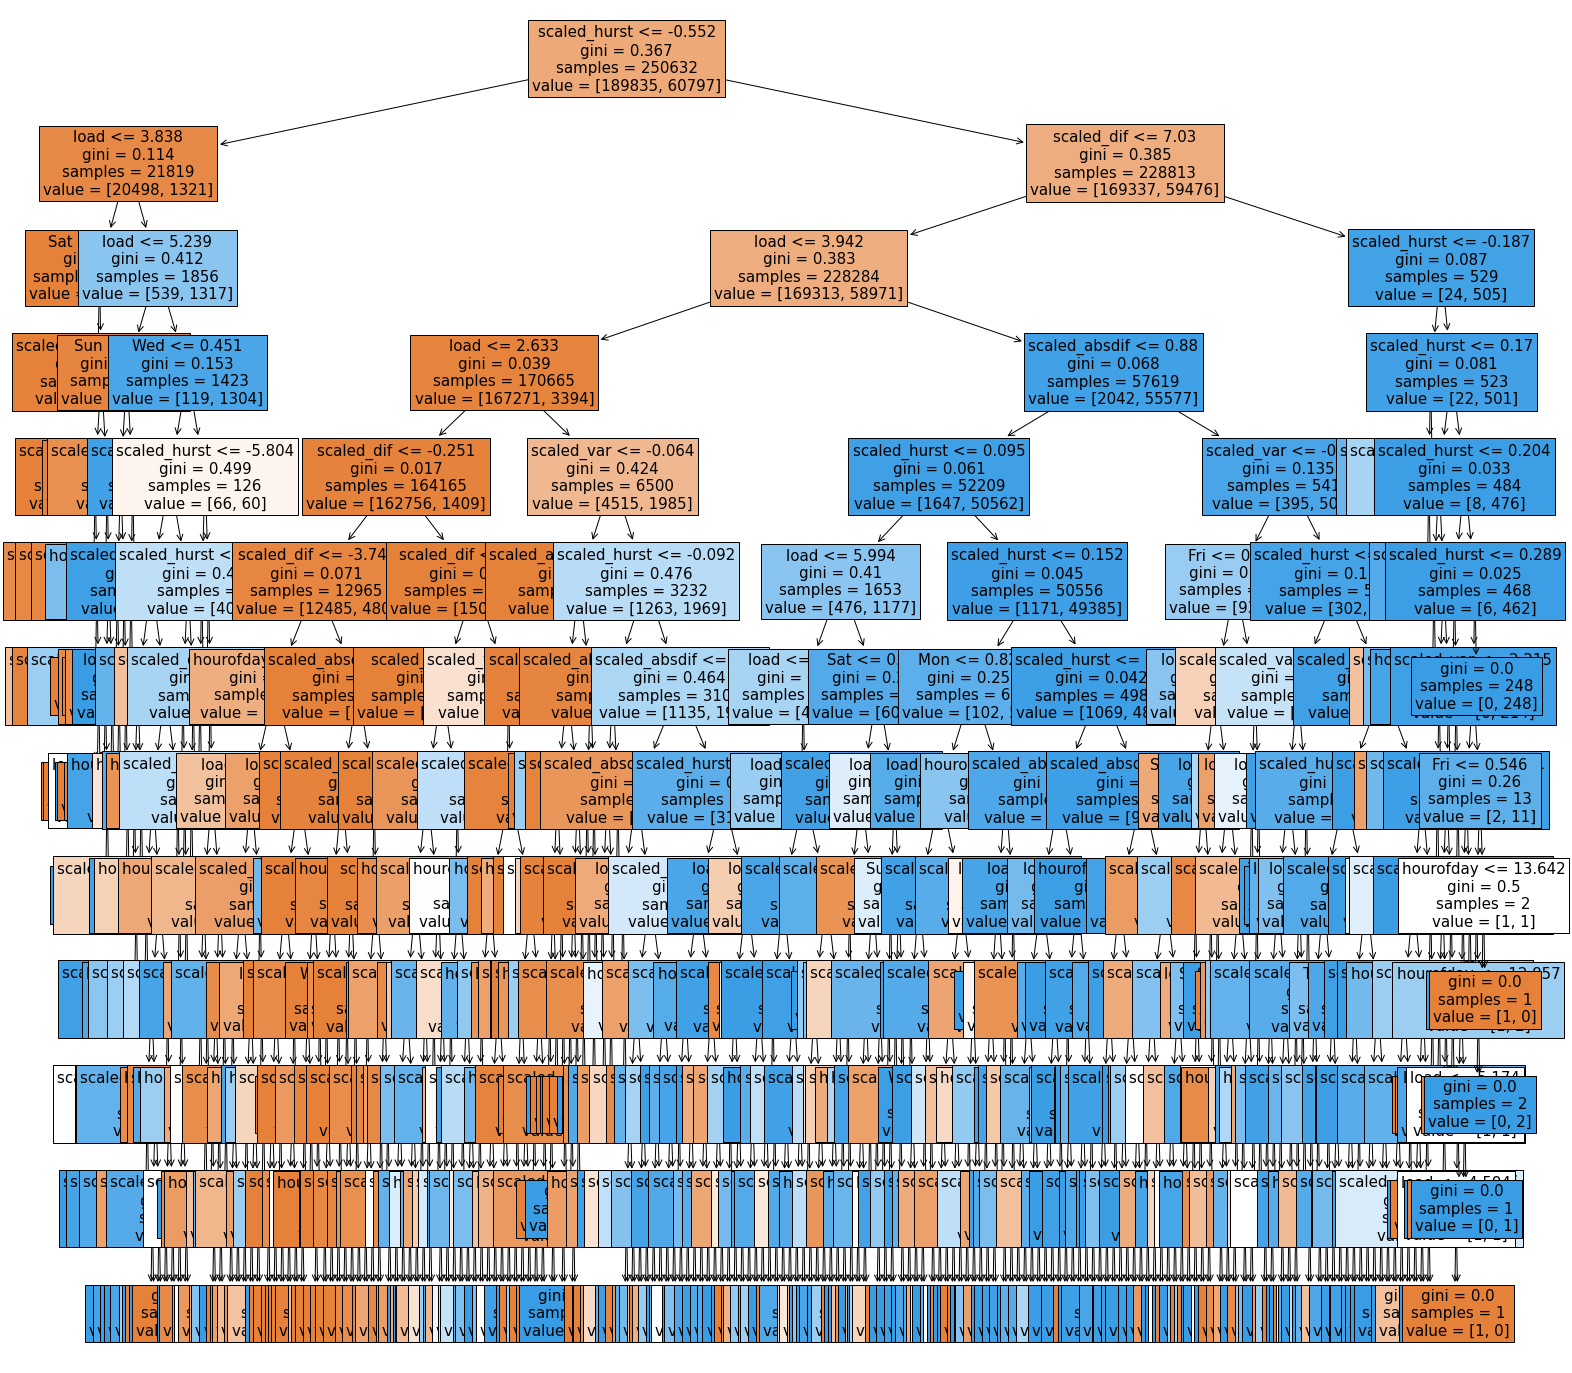

In [51]:
TreeFeatureImportance(dt_ac, trainX, graph = True)

## 2.3 Model 2: Linear Discriminative Analysis (LDA)<a class="anchor" id="sec_2.3"></a>  

### 2.3.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_2.3.1"></a>

In [26]:
lda = LinearDiscriminantAnalysis()
# initialise the LDA model object 

lda_grid = {'solver':['svd','lsqr','eigen'],\
           'shrinkage':[i*0.1 for i in range(0,11,2)]+['auto']}
# possible candidates for the LDA hyperparameters

lda_candidates, lda_cv = HyperparametersSummary(lda, lda_grid, 3, \
                                                           trainX, trainY, 15)
# 3-fold cross validation for LDA model with the training set 
# return the top-15 best performing models and their hyperparameter combination

Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV] END ..........................shrinkage=0.0, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.0, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.0, solver=svd; total time=   0.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/

[CV] END .........................shrinkage=0.0, solver=lsqr; total time=   0.3s
[CV] END .........................shrinkage=0.0, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=0.0, solver=lsqr; total time=   0.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 558, in fit
    self._solve_eigen(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 419, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/opt/anaconda3/lib/python3.8/site-packages/scipy/linalg/decomp.py", line 578, in eigh
    raise LinAlgError('The leading minor of order {} of B is not '
numpy.linalg.LinAlgError: The leading minor of order 9 of B is not positive definite. The factorization of B could not be completed and

[CV] END ........................shrinkage=0.0, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=0.0, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=0.0, solver=eigen; total time=   0.2s
[CV] END ..........................shrinkage=0.2, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.2, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.2, solver=svd; total time=   0.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/

[CV] END .........................shrinkage=0.2, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=0.2, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=0.2, solver=lsqr; total time=   0.2s
[CV] END ........................shrinkage=0.2, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=0.2, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=0.2, solver=eigen; total time=   0.2s
[CV] END ..........................shrinkage=0.4, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.4, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.4, solver=svd; total time=   0.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/

[CV] END .........................shrinkage=0.4, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=0.4, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=0.4, solver=lsqr; total time=   0.2s
[CV] END ........................shrinkage=0.4, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=0.4, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=0.4, solver=eigen; total time=   0.2s
[CV] END ...........shrinkage=0.6000000000000001, solver=svd; total time=   0.0s
[CV] END ...........shrinkage=0.6000000000000001, solver=svd; total time=   0.0s
[CV] END ...........shrinkage=0.6000000000000001, solver=svd; total time=   0.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/

[CV] END ..........shrinkage=0.6000000000000001, solver=lsqr; total time=   0.2s
[CV] END ..........shrinkage=0.6000000000000001, solver=lsqr; total time=   0.2s
[CV] END ..........shrinkage=0.6000000000000001, solver=lsqr; total time=   0.2s
[CV] END .........shrinkage=0.6000000000000001, solver=eigen; total time=   0.2s
[CV] END .........shrinkage=0.6000000000000001, solver=eigen; total time=   0.2s
[CV] END .........shrinkage=0.6000000000000001, solver=eigen; total time=   0.2s
[CV] END ..........................shrinkage=0.8, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.8, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.8, solver=svd; total time=   0.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/

[CV] END .........................shrinkage=0.8, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=0.8, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=0.8, solver=lsqr; total time=   0.2s
[CV] END ........................shrinkage=0.8, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=0.8, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=0.8, solver=eigen; total time=   0.2s
[CV] END ..........................shrinkage=1.0, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=1.0, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=1.0, solver=svd; total time=   0.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/

[CV] END .........................shrinkage=1.0, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=1.0, solver=lsqr; total time=   0.2s
[CV] END .........................shrinkage=1.0, solver=lsqr; total time=   0.2s
[CV] END ........................shrinkage=1.0, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=1.0, solver=eigen; total time=   0.2s
[CV] END ........................shrinkage=1.0, solver=eigen; total time=   0.2s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/

[CV] END ........................shrinkage=auto, solver=lsqr; total time=   0.3s
[CV] END ........................shrinkage=auto, solver=lsqr; total time=   0.3s
[CV] END ........................shrinkage=auto, solver=lsqr; total time=   0.3s
[CV] END .......................shrinkage=auto, solver=eigen; total time=   0.4s
[CV] END .......................shrinkage=auto, solver=eigen; total time=   0.4s
[CV] END .......................shrinkage=auto, solver=eigen; total time=   0.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.95626231        nan        nan 0.95752976 0.95752976
        nan 0.95732837 0.95732837        nan 0.95252383 0.95252383
        nan 0.85755652 0.85755652        nan 0.56092727 0.56092727
        nan 0.95625449 0.95625449]
  warnings.warn(


In [27]:
lda_candidates.head(10)

shrinkage solver  mean_fit_time  mean_test_score  std_test_score
4        0.2   lsqr       0.183633         0.957530        0.000714
5        0.2  eigen       0.202859         0.957530        0.000714
7        0.4   lsqr       0.180180         0.957328        0.000763
8        0.4  eigen       0.195067         0.957328        0.000763
1        0.0   lsqr       0.208454         0.956262        0.000584
19      auto   lsqr       0.258323         0.956254        0.000577
20      auto  eigen       0.354625         0.956254        0.000577
10       0.6   lsqr       0.174441         0.952524        0.000836
11       0.6  eigen       0.204042         0.952524        0.000836
13       0.8   lsqr       0.191236         0.857557        0.003302

In [29]:
best_parameters['lda_ac'] = {'shrinkage':0.2,\
                            'solver':'lsqr'}

### 2.3.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_2.3.2"></a>

In [30]:
lda_ac = LinearDiscriminantAnalysis(**best_parameters['lda_ac'])
lda_ac, _ = ModelFitting(lda_ac, trainX, trainY, validX, validY)

accuracy   0.9791546969261706
recall     0.9615403591868956
precision  0.9529595853402117
fl         0.9572307427827647


In [31]:
pd.DataFrame({'feature':trainX.columns,\
             'coefficient':lda_ac.coef_[0]})\
.sort_values('coefficient', ascending = False)

feature  coefficient
0            load     3.145625
12     scaled_var     0.738683
9    scaled_hurst     0.324874
11  scaled_absdif     0.193802
10     scaled_dif     0.165200
5             Thu     0.023823
6             Fri     0.017632
8             Sun     0.001471
4             Wed    -0.002493
7             Sat    -0.007549
3             Tue    -0.013414
2             Mon    -0.019471
1       hourofday    -0.047464

## 2.4 Select the Best Model<a class="anchor" id="sec_2.4"></a>       

In [32]:
'''
ModelsCrossValidation

input: 
models - an array of models fit to trainset 
X - concatenated data set of training & valid dataset
Y - concatenated labels from training & valid dataset
n_fold - number of folds for cross validation, default is 3

output: a dataframe summarising the results from cross validation procedure.
Each model and its respective validation results is a single column.
'''

def ModelsCrossValidation(models, X, Y, n_fold = 3, scoring = 'f1'): 
    
    crossValScores = pd.DataFrame(columns = list(map(lambda x: type(x).__name__, models)),\
                             index = [f'Fold {i+1}' for i in range(n_fold)]+\
                                  ['Average','Total CV Time'])
    # empty dataframe 
    # model object's name, test score of each fold, average test score
    # and the total cross validation time is recorded 
    
    start = time.time()
    # start timing the validation process
    for i in range(len(models)): 
        crossValScores.iloc[:n_fold, i] = cross_val_score(models[i], X, Y, \
                                                     cv = n_fold, \
                                                          scoring = scoring)
        # perform cross validation on the model and the entire data set 
        # the test score is the F-1 score from each fold 
        
        stop = time.time()
        # stop timing the cross validation process 
        crossValScores.iloc[n_fold, i] = crossValScores.iloc[:n_fold, i].mean()
        # obtain the average F-1 score from all folds 

        crossValScores.iloc[n_fold+1, i] = f'{round(stop - start,6)} s'
        # calculate the duration of cross validation process 
    return crossValScores

In [33]:
X = pd.concat([trainX, validX])
Y = pd.concat([trainY, validY])

ModelsCrossValidation([lda_ac, dt_ac], X, Y, n_fold = 5)

LinearDiscriminantAnalysis DecisionTreeClassifier
Fold 1                          0.957611               0.980817
Fold 2                          0.957042               0.978666
Fold 3                          0.958405               0.980233
Fold 4                          0.956723               0.980482
Fold 5                          0.957646               0.976753
Average                         0.957485                0.97939
Total CV Time                 2.003425 s              3.87748 s

In [59]:
bestModels = dict()
# the dictionary to store the best model 
bestModels['ac'] = dt_ac
# best model for target AC is the decision tree 

# Part 3. Model Development:`oven`<a class="anchor" id="sec_3"></a>

* [3.1 Feature Engineering](#sec_3.1)
* [3.2 Model 1: Decision Tree](#sec_3.2)
    * [3.2.1 Cross Validation for Hyperparameter Tuning](#sec_3.2.1)
    * [3.2.2 Model Fitting and Result Interpretation](#sec_3.2.2)
* [3.3 Extract Minimal Timeseries Features with `tsfresh`](#_sec3.3)
* [3.4 Model 2: Random Forest with TS Features](#sec_3.4)
    * [3.4.1 Cross Validation for Hyperparameter Tuning](#sec_3.4.1)
    * [3.4.2 Model Fitting and Result Interpretation](#sec_3.4.2)
* [3.5 Model 3: AdaBoost with TS Features](#sec_3.5)
    * [3.5.1 Cross Validation for Hyperparameter Tuning](#sec_3.5.1)
    * [3.5.2 Model Fitting and Result Interpretation](#sec_3.5.2)
* [3.6 Select the Best Model](#sec_3.6)

For the target oven we have few of class 1 observations in comparison to other targets. Moreover, oven also had a low percentage of ‘standalone’ observations, observations that can solely be attributed to the use of one appliance. Based on these factors we expect relatively poor model performance in comparison to the other targets. 

Based on the EDA done before and the trial-and-error model testing process we used the features **hourofday**, **nonlinear**, **load**, **max** to train the models for target AC. Moreover, using feature engineering we created the additional features **hurst scaled**, **dif scaled**, **entropy scaled**, **var scaled**, **absdif scaled** as well as a set of timeseries features using the tsfresh library.

The models chosen for target AC are:

- Decision tree
- Random Forest using Time Series features
- AdaBoost Classifier

After cross validating the models to tune hyperparameters we trained all models on the full data set. We then compared the final model’s performance using 5-fold cross-validation.

## 3.1 Feature Engineering<a class="anchor" id="sec_3.1"></a>  

In [60]:
oven = df[['oven', 'load','nonlinear', 'max','hourofday']+dayofweek]
# select the features based on the result from EDA
oven = StandardScaler_df(['dif','hurst','absdif','load','entropy'], oven)
# scale the features with StandardScaler 

<ipython-input-36-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)
<ipython-input-36-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)
<ipython-input-36-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [61]:
ovenX = oven.drop('oven', axis = 1)
# X is ac data frame excluding the target variable 
ovenY = oven.oven
# Y is the target variable

trainX, validX, trainY, validY = train_test_split(ovenX, ovenY,\
                                                 test_size = 0.4,\
                                                  shuffle=True)

## 3.2 Model 1: Decision Tree<a class="anchor" id="sec_3.2"></a> 

### 3.2.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_3.2.1"></a> 

In [62]:
dt = DecisionTreeClassifier()
# establish the DecisionTreeClassifer object

dt_grid ={'max_depth':[*range(2,17,2)],\
        'max_features':['sqrt', 'log2', None],\
         'splitter':['best','random']}
# possible hyperparameter candidates for cross validation 

dt_oven_candidates, dt_oven_cv = HyperparametersSummary(dt, dt_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, sp

[CV] END ...max_depth=12, max_features=log2, splitter=random; total time=   0.1s
[CV] END .....max_depth=12, max_features=None, splitter=best; total time=   1.2s
[CV] END .....max_depth=12, max_features=None, splitter=best; total time=   1.2s
[CV] END .....max_depth=12, max_features=None, splitter=best; total time=   1.2s
[CV] END ...max_depth=12, max_features=None, splitter=random; total time=   0.2s
[CV] END ...max_depth=12, max_features=None, splitter=random; total time=   0.2s
[CV] END ...max_depth=12, max_features=None, splitter=random; total time=   0.2s
[CV] END .....max_depth=14, max_features=sqrt, splitter=best; total time=   0.3s
[CV] END .....max_depth=14, max_features=sqrt, splitter=best; total time=   0.3s
[CV] END .....max_depth=14, max_features=sqrt, splitter=best; total time=   0.3s
[CV] END ...max_depth=14, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ...max_depth=14, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ...max_depth=14, ma

In [63]:
dt_oven_candidates.head(10)

max_depth max_features splitter  mean_fit_time  mean_test_score  \
46         16         None     best       1.086795         0.706774   
40         14         None     best       1.094793         0.692714   
47         16         None   random       0.147629         0.668555   
34         12         None     best       1.153044         0.668331   
44         16         log2     best       0.231969         0.667530   
42         16         sqrt     best       0.268109         0.647536   
28         10         None     best       0.951091         0.640478   
41         14         None   random       0.150133         0.637160   
36         14         sqrt     best       0.261021         0.627736   
38         14         log2     best       0.250742         0.627216   

    std_test_score  
46        0.006814  
40        0.009325  
47        0.012156  
34        0.006313  
44        0.010670  
42        0.030520  
28        0.023695  
41        0.025202  
36        0.027281  
38        0.010123

In [64]:
best_parameters['dt_oven'] = {'max_depth':14,\
                             'max_features':None,\
                             'splitter':'best'}

### 3.2.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_3.2.2"></a>        

In [65]:
dt_oven = DecisionTreeClassifier(**best_parameters['dt_oven'])
dt_oven, _ = ModelFitting(dt_oven, trainX, trainY, validX, validY)

accuracy   0.9918067126304702
recall     0.7011445527766003
precision  0.7135461604831751
fl         0.707290998503314


Feature  Importance
2              max    0.216133
14     scaled_load    0.214973
12    scaled_hurst    0.182113
0             load    0.069915
3        hourofday    0.069896
13   scaled_absdif    0.063600
11      scaled_dif    0.050075
15  scaled_entropy    0.045842
1        nonlinear    0.039514
8              Fri    0.013925
4              Mon    0.010235
5              Tue    0.009844
10             Sun    0.005415
6              Wed    0.004383
7              Thu    0.002177
9              Sat    0.001960

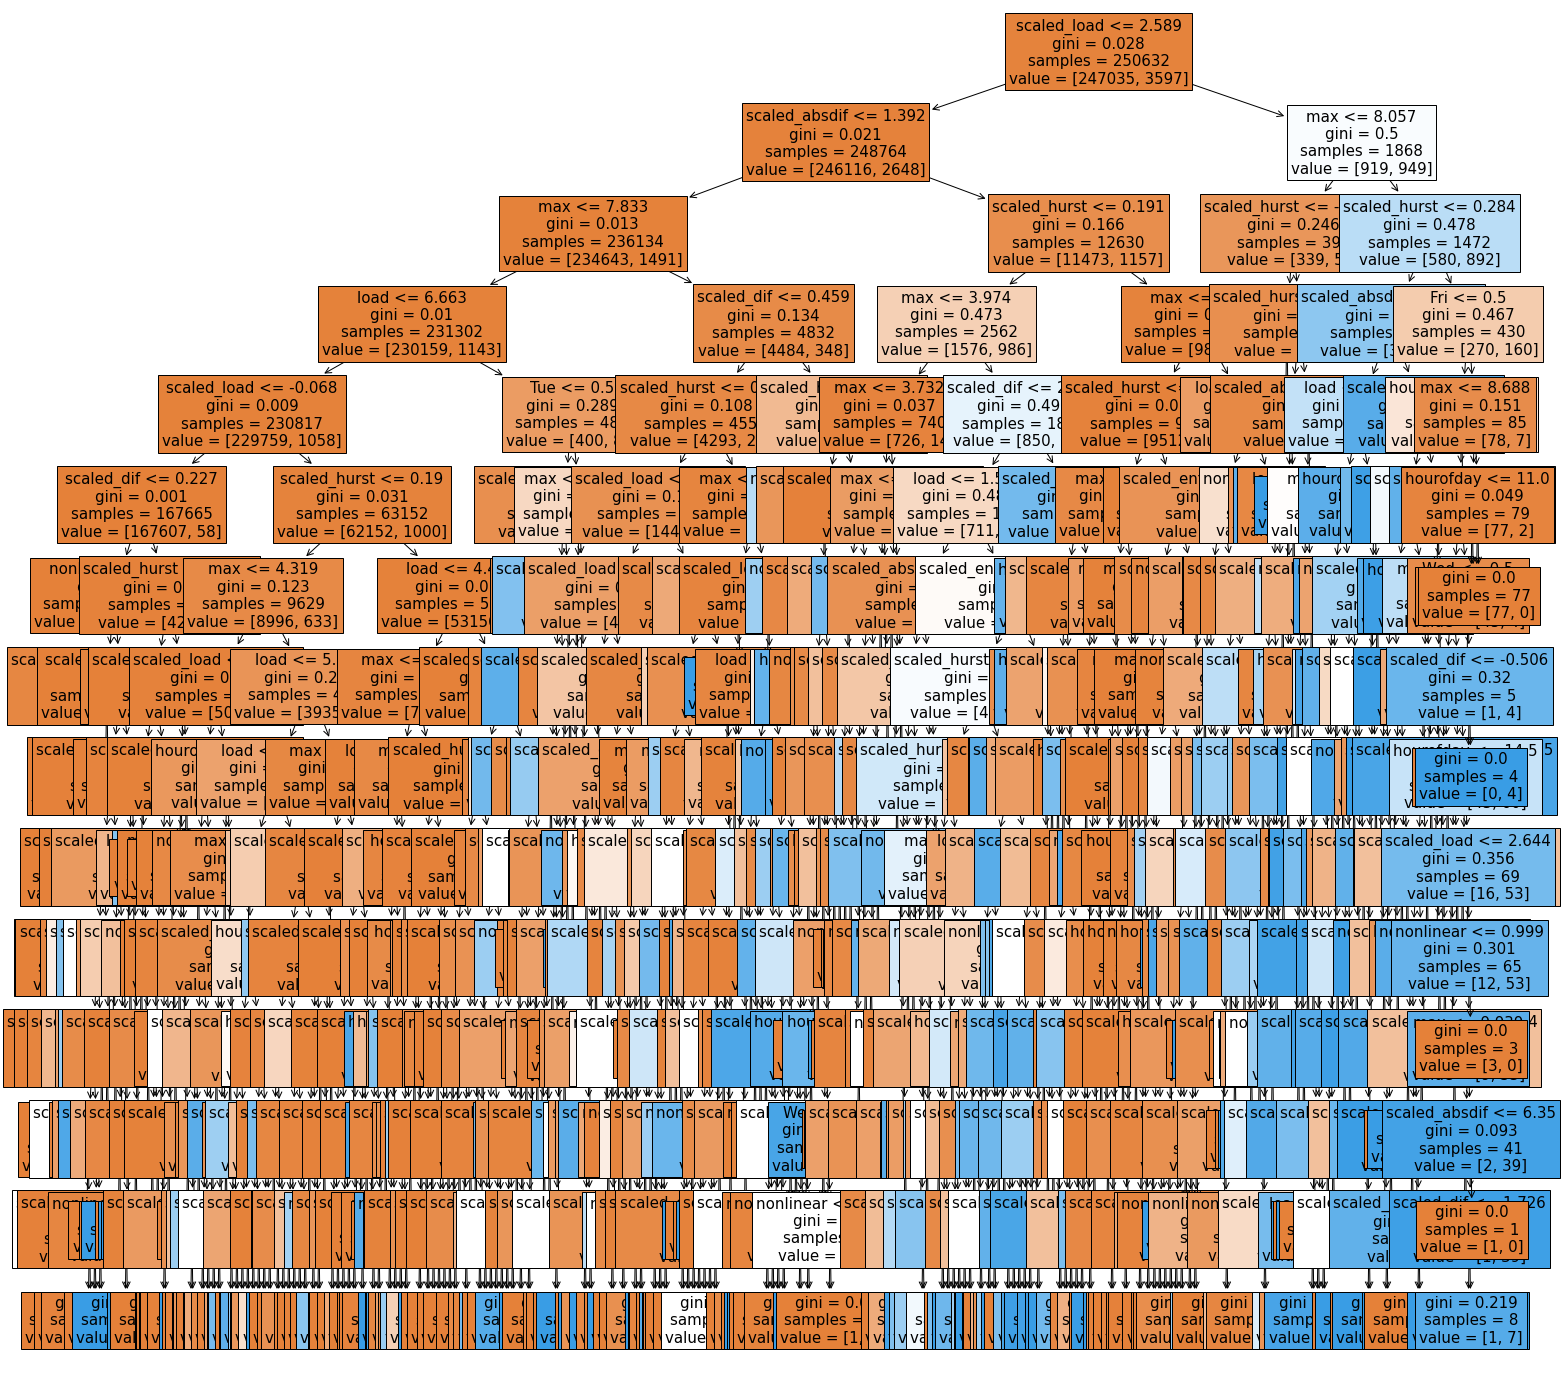

In [66]:
TreeFeatureImportance(dt_oven, trainX, graph = True)

## 3.3 Extract Minimal Timeseries Features with `tsfresh`<a class="anchor" id="sec_3.3"></a> 

In [67]:
'''
PlotFeatureClass

input: 
feature - the feature to compare the difference in two classes with 
df - dataframe with target 
target - the name of the target 

This function takes the feature name, which'll mainly be one of
the newly-extracted timeseries features. With the newly extracted 
features, the function plots the line graph of the feature based on 
each target class. 
'''
def PlotFeatureClass(feature, df, target):
    plt.plot(df[feature][df[target] == 0], label = '0')
    # plot the feature but only when target class == 0 
    plt.plot(df[feature][df[target] == 1], label = '1')
    # plot the feature but only when target class == 1
    plt.xlabel('Timestamp')
    plt.ylabel(feature)
    plt.title(f'{feature}~{target}')
    plt.legend()
    # set title and labels of each axis

In [68]:
hr_id = [*range(1,20000)]
# generate an array of integers 
hr = np.repeat(hr_id, 60)[:df.shape[0]]
# replicate 60 of each integer, representing each hour 
df['hr'] = hr
# for each hour, an hour_id is assigned for feature extraction 

In [69]:
settings = MinimalFCParameters()
# with oven, we first try out minimal time series features 
features = ef(df[['load','hr']], column_id = 'hr', default_fc_parameters = settings)
# extract time series features based on window size of 60, step by 60
# hourly features 
features.dropna(axis = 1, inplace = True)
# drop all the extracted features with NaN values
features['hr'] = features.index
# the index of features data frame is the hour ID of the original dataframe 
merged_oven_hr = df[['hr','oven']].merge(features, on = 'hr')
# merge the original data frame with the newly-extracted features 
filtered = sf(merged_oven_hr.drop('hr', axis = 1), \
              np.asarray(merged_oven_hr['oven']))
# filter extracted features with no significance to the binary classification

Feature Extraction: 100%|██████████| 40/40 [00:04<00:00,  8.44it/s]


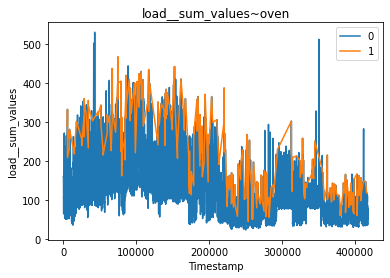

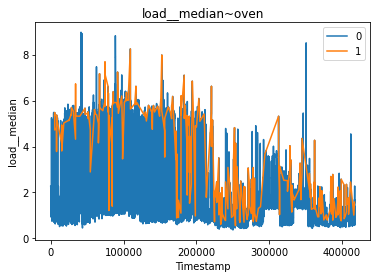

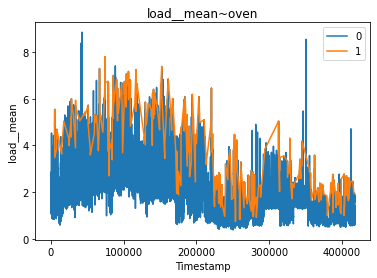

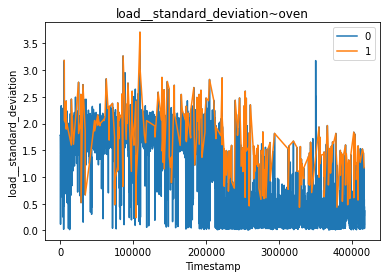

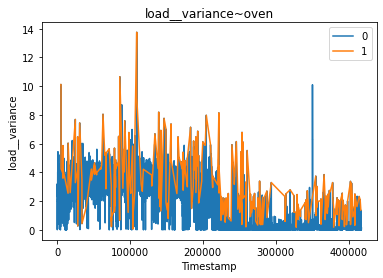

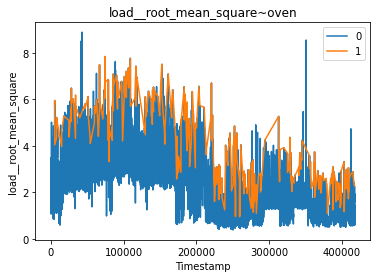

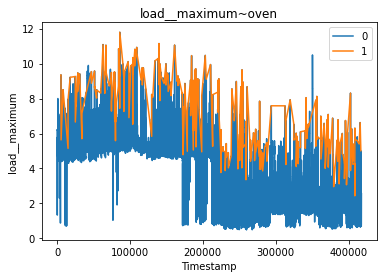

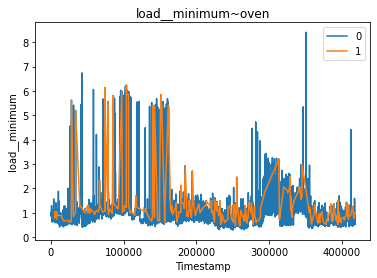

In [70]:
for i in range(filtered.shape[1]-1):
    plt.figure(i+1)
    PlotFeatureClass(filtered.columns[i],filtered,'oven')

In [71]:
oven = pd.concat([oven, \
                  filtered.drop(['oven',\
                                 'load__standard_deviation',\
                                 'load__variance',\
                                 'load__minimum', \
                                 'load__maximum'], \
                                      axis = 1)], \
                 axis = 1)
# drop the features that visually do not have significance to binary classification 
# drop the features that are already extracted using 60-min time window with the stepsize of 1

In [72]:
ovenX = oven.drop('oven', axis = 1)
# X is ac data frame excluding the target variable 
ovenY = oven.oven
# Y is the target variable

trainX, validX, trainY, validY = train_test_split(ovenX, ovenY,\
                                                 test_size = 0.4,shuffle=True)

In [73]:
columnNames['oven'] = list(ovenX.columns)
# store the feature names when predicting using test data

## 3.4 Model 2: Random Forest with TS Features<a class="anchor" id="sec_3.4"></a>   

### 3.4.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_3.4.1"></a>   

In [74]:
rf = RandomForestClassifier()
# configure RandomForestClassifier()

rf_grid ={'max_depth':[*range(9,ovenX.shape[1],3)],\
        'max_features':['sqrt', 'log2']}
# hyperparmeters for tuning 
# the cross validation is performed using grid search on all parameter candidates

oven_rf_candidates, oven_rf_cv = HyperparametersSummary(rf, rf_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .....................max_depth=9, max_features=sqrt; total time=  15.9s
[CV] END .....................max_depth=9, max_features=sqrt; total time=  16.2s
[CV] END .....................max_depth=9, max_features=sqrt; total time=  16.5s
[CV] END .....................max_depth=9, max_features=log2; total time=  16.2s
[CV] END .....................max_depth=9, max_features=log2; total time=  16.3s
[CV] END .....................max_depth=9, max_features=log2; total time=  16.4s
[CV] END ....................max_depth=12, max_features=sqrt; total time=  18.8s
[CV] END ....................max_depth=12, max_features=sqrt; total time=  18.4s
[CV] END ....................max_depth=12, max_features=sqrt; total time=  18.3s
[CV] END ....................max_depth=12, max_features=log2; total time=  17.6s
[CV] END ....................max_depth=12, max_features=log2; total time=  18.7s
[CV] END ....................max_depth=12, max_fe

In [75]:
oven_rf_candidates.head(10)

max_depth max_features  mean_fit_time  mean_test_score  std_test_score
7         18         log2      18.652250         0.852258        0.003695
6         18         sqrt      19.784739         0.849952        0.006197
4         15         sqrt      18.175483         0.829401        0.006193
5         15         log2      18.380839         0.821090        0.005251
2         12         sqrt      18.029694         0.756756        0.006007
3         12         log2      17.789497         0.750422        0.009626
1          9         log2      15.893350         0.674089        0.008805
0          9         sqrt      15.805186         0.672433        0.008919

In [76]:
best_parameters['rf_oven'] = {'max_depth':18,\
                             'max_features':'sqrt'}

### 3.4.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_3.4.2"></a> 

In [77]:
rf_oven = RandomForestClassifier(**best_parameters['rf_oven'])
rf_oven, _ = ModelFitting(rf_oven, trainX, trainY, validX, validY)

accuracy   0.9964390022024322
recall     0.8063291139240506
precision  0.9335613092330239
fl         0.8652931854199682


In [78]:
TreeFeatureImportance(rf_oven, trainX, graph = False)

Feature  Importance
0                     load    0.136870
14             scaled_load    0.122711
2                      max    0.111359
17            load__median    0.077335
12            scaled_hurst    0.074760
13           scaled_absdif    0.069211
19  load__root_mean_square    0.068368
15          scaled_entropy    0.067667
16        load__sum_values    0.063152
11              scaled_dif    0.058735
18              load__mean    0.056688
1                nonlinear    0.031558
3                hourofday    0.031256
5                      Tue    0.007555
8                      Fri    0.005297
4                      Mon    0.004621
6                      Wed    0.003795
10                     Sun    0.003614
7                      Thu    0.002753
9                      Sat    0.002693

## 3.5 Model 3: AdaBoost with TS Features<a class="anchor" id="sec_3.5"></a>   

### 3.5.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_3.5.1"></a> 

In [79]:
ada = AdaBoostClassifier()

ada_grid = {'algorithm':['SAMME', 'SAMME.R'],\
           'learning_rate':[i*0.1 for i in range(5,11)]}
# hyperparmeters for tuning 
# the cross validation is performed using grid search on all parameter candidates

candidates_ada_oven, cv_ada_oven = HyperparametersSummary(ada, ada_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .................algorithm=SAMME, learning_rate=0.5; total time=   8.6s
[CV] END .................algorithm=SAMME, learning_rate=0.5; total time=   8.1s
[CV] END .................algorithm=SAMME, learning_rate=0.5; total time=   8.2s
[CV] END ..algorithm=SAMME, learning_rate=0.6000000000000001; total time=   8.0s
[CV] END ..algorithm=SAMME, learning_rate=0.6000000000000001; total time=   8.2s
[CV] END ..algorithm=SAMME, learning_rate=0.6000000000000001; total time=   7.7s
[CV] END ..algorithm=SAMME, learning_rate=0.7000000000000001; total time=   7.9s
[CV] END ..algorithm=SAMME, learning_rate=0.7000000000000001; total time=   8.2s
[CV] END ..algorithm=SAMME, learning_rate=0.7000000000000001; total time=   8.1s
[CV] END .................algorithm=SAMME, learning_rate=0.8; total time=   8.2s
[CV] END .................algorithm=SAMME, learning_rate=0.8; total time=   8.6s
[CV] END .................algorithm=SAMME, learn

In [80]:
candidates_ada_oven.head(10)

algorithm  learning_rate  mean_fit_time  mean_test_score  std_test_score
11   SAMME.R            1.0       8.058839         0.563886        0.013315
10   SAMME.R            0.9       8.281166         0.545949        0.008354
9    SAMME.R            0.8       8.089800         0.532604        0.023891
8    SAMME.R            0.7       8.466849         0.524664        0.022404
7    SAMME.R            0.6       8.210361         0.499811        0.015588
6    SAMME.R            0.5       8.496090         0.499186        0.013443
5      SAMME            1.0       8.011954         0.471525        0.029730
4      SAMME            0.9       7.730432         0.409138        0.052494
3      SAMME            0.8       8.103916         0.359190        0.043798
1      SAMME            0.6       7.765199         0.333266        0.013019

In [81]:
best_parameters['ada_oven'] = {'algorithm':'SAMME.R',\
                              'learning_rate':0.9}

### 3.5.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_3.5.2"></a>   

In [82]:
ada_oven = AdaBoostClassifier(**best_parameters['ada_oven'])
ada_oven, _ = ModelFitting(ada_oven, trainX, trainY, validX, validY)

accuracy   0.98894594465192
recall     0.4417721518987342
precision  0.6664544875875239
fl         0.5313372240548084


In [83]:
TreeFeatureImportance(ada_oven, trainX, graph = False)

Feature  Importance
17            load__median        0.18
2                      max        0.18
0                     load        0.16
3                hourofday        0.10
19  load__root_mean_square        0.08
12            scaled_hurst        0.06
13           scaled_absdif        0.06
14             scaled_load        0.04
16        load__sum_values        0.04
18              load__mean        0.04
8                      Fri        0.02
1                nonlinear        0.02
15          scaled_entropy        0.02
5                      Tue        0.00
6                      Wed        0.00
7                      Thu        0.00
9                      Sat        0.00
11              scaled_dif        0.00
4                      Mon        0.00
10                     Sun        0.00

## 3.6 Select the Best Model<a class="anchor" id="sec_3.6"></a> 

In [84]:
X = pd.concat([trainX, validX])
Y = pd.concat([trainY, validY])

ModelsCrossValidation([dt_oven, rf_oven, ada_oven], \
                      X, Y, n_fold = 5)

DecisionTreeClassifier RandomForestClassifier AdaBoostClassifier
Fold 1                       0.81183               0.901582           0.558487
Fold 2                       0.81617               0.897221           0.561194
Fold 3                      0.794437               0.885319           0.531658
Fold 4                      0.817213               0.881462           0.528112
Fold 5                      0.783595               0.873995           0.540218
Average                     0.804649               0.887916           0.543934
Total CV Time            17.198805 s           244.894316 s        335.42149 s

In [85]:
bestModels['oven'] = rf_oven

# Part 4. Model Development:`dryer`

* [4.1 Feature Engineering](#sec_4.1)
* [4.2 Model 1: Decision Tree](#sec_4.2)
    * [4.2.1 Cross Validation for Hyperparameter Tuning](#sec_4.2.1)
    * [4.2.2 Model Fitting and Result Interpretation](#sec_4.2.2)
* [4.3 Extract Selected Timeseries Features using `tsfresh`](#sec_4.3)
* [4.4 Model 2: Random Forest with TS Features](#sec_4.4)
    * [4.4.1 Cross Validation for Hyperparameter Tuning](#sec_4.4.1)
    * [4.4.2 Model Fitting and Result Interpretation](#sec_4.4.2)
* [4.5 Model 3: Gradient Boosting Classifier with TS Features](#sec_4.5)
    * [4.5.1 Cross Validation for Hyperparameter Tuning](#sec_4.5.1)
    * [4.5.2 Model Fitting and Result Interpretation](#sec_4.5.2)
* [4.6 Select the Best Model](#sec_4.6)

For the target dryer we have few of class 1 observations in comparison to other targets. Moreover, dryer also had a low percentage of *standalone* observations, observations that can solely be attributed to the use of one appliance. Based on these factors we expect relatively poor model performance in comparison to the other targets. 

Based on the EDA done before and the trial-and-error model testing process we used the features **hourofday**, **dayofweek**, **max**, **absdif** to train the models for target AC. Moreover, using feature engineering we created the additional features **hurst scaled**, **entropy scaled** as well as a set of timeseries features using the tsfresh library.
The models chosen for target AC are:

- Decision tree
- Random Forest using Time Series features
- Gradient Boosting Classifier using Time Series features

After cross validating the models to tune hyperparameters we trained all models on the full data set. We then compared the final model’s performance using 5-fold cross-validation.

## 4.1 Feature Engineering<a class="anchor" id="sec_4.1"></a> 

In [87]:
dryer = df[['dryer','absdif', 'max','hourofday']+dayofweek]
dryer = StandardScaler_df(['hurst','entropy'], dryer)

<ipython-input-36-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)
<ipython-input-36-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)


In [88]:
dryerX = dryer[dryer.columns[dryer.columns!='dryer']]
# X is dryer data frame excluding the target variable 
dryerY = df['dryer']
# Y is the target variable
trainX, validX, trainY, validY = train_test_split(dryerX, dryerY,\
                                                 test_size = 0.4,\
                                                  shuffle=True)

## 4.2 Model 1: Decision Tree<a class="anchor" id="sec_4.2"></a>

### 4.2.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_4.2.1"></a>    

In [89]:
dt = DecisionTreeClassifier()
# establish the DecisionTreeClassifer object

dt_grid ={'max_depth':[*range(2,12,2)],\
        'max_features':['sqrt', 'log2', None],\
         'splitter':['best','random']}
# possible hyperparameter candidates for cross validation 

dt_dryer_candidates, dt_dryer_cv = HyperparametersSummary(dt, dt_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.0s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, spl

In [90]:
dt_dryer_candidates.head(10)

max_depth max_features splitter  mean_fit_time  mean_test_score  \
28         10         None     best       0.620754         0.339617   
22          8         None     best       0.476839         0.236904   
29         10         None   random       0.095626         0.202487   
26         10         log2     best       0.159565         0.195863   
16          6         None     best       0.406179         0.180232   
24         10         sqrt     best       0.182133         0.179978   
20          8         log2     best       0.155725         0.120368   
18          8         sqrt     best       0.167781         0.117357   
23          8         None   random       0.097119         0.108804   
12          6         sqrt     best       0.116203         0.081528   

    std_test_score  
28        0.023398  
22        0.014613  
29        0.043170  
26        0.047778  
16        0.013075  
24        0.012300  
20        0.015741  
18        0.008182  
23        0.013433  
12        0.017356

In [91]:
best_parameters['dt_dryer'] = {'max_depth':10,\
                              'max_features':None,\
                              'splitter':'best'}

### 4.2.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_4.2.2"></a>    

In [92]:
dt_dryer = DecisionTreeClassifier(**best_parameters['dt_dryer'])
dt_dryer,_ = ModelFitting(dt_dryer,trainX, trainY, validX, validY)

accuracy   0.9718471703533468
recall     0.2064445658110322
precision  0.7667342799188641
fl         0.3253012048192771


Feature  Importance
1              max    0.445865
2        hourofday    0.151107
0           absdif    0.128033
10    scaled_hurst    0.121897
11  scaled_entropy    0.050677
3              Mon    0.031299
4              Tue    0.019694
9              Sun    0.016007
6              Thu    0.012801
5              Wed    0.009999
7              Fri    0.007823
8              Sat    0.004798

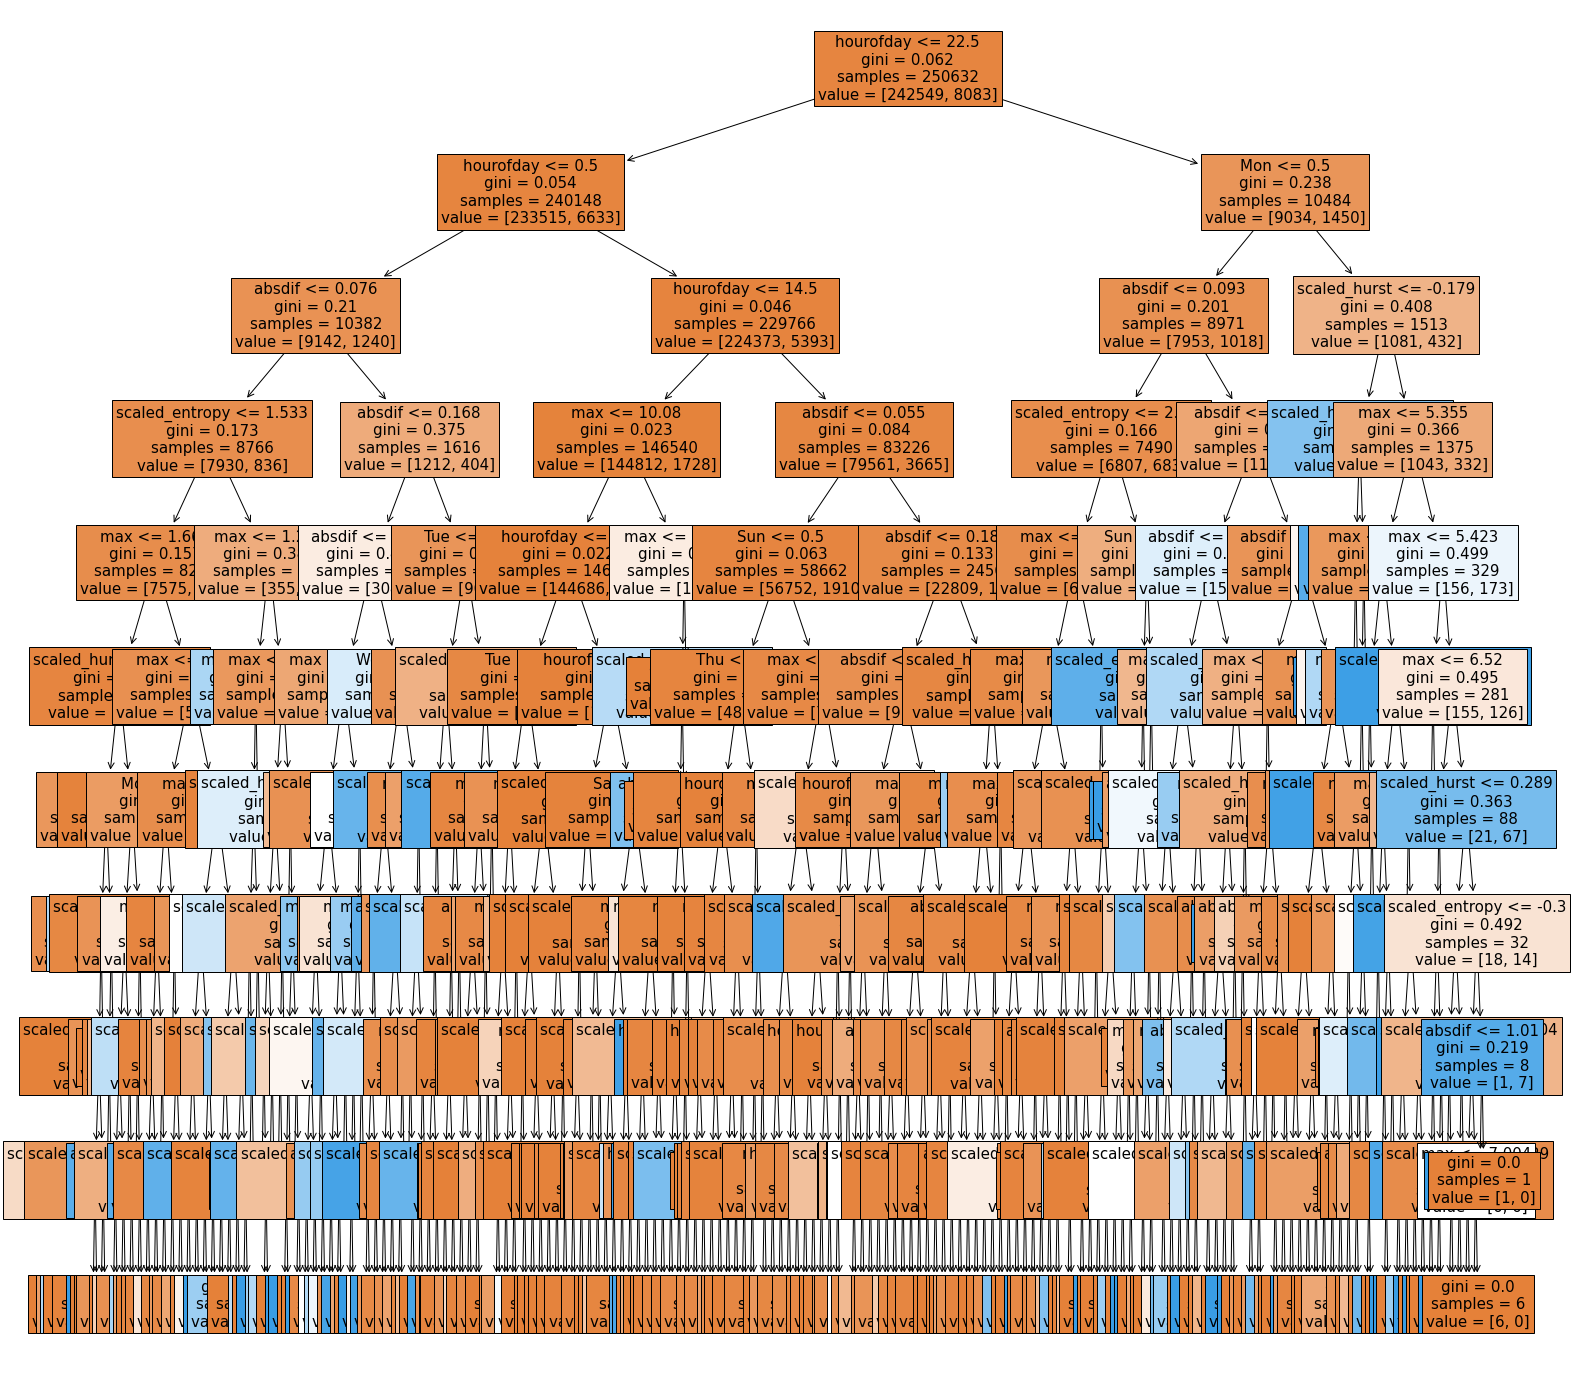

In [93]:
TreeFeatureImportance(dt_dryer, trainX, graph = True)

## 4.3 Extract Selected Timeseries Features using `tsfresh`<a class="anchor" id="sec_4.3"></a>  

In [94]:
fc_params = {'ar_coefficient':[{'k':10,'coeff':6},\
                             {'k':10,'coeff':3},\
                             {'k':10,'coeff':9},],\
            'percentage_of_reoccurring_values_to_all_values':None,\
            'fft_aggregated':[{'aggtype':'skew'},{'aggtype':'kurtosis'}]}
# time series variables for extraction

In [95]:
features = ef(df[['load','hr']], column_id = 'hr', \
              default_fc_parameters = fc_params)
# extract time series features based on window size of 60, step by 60
# hourly features 
features.dropna(axis = 1, inplace = True)
# drop all the extracted features with NaN values
features['hr'] = features.index
# the index of features data frame is the hour ID of the original dataframe 
merged_dryer_hr = df[['hr','dryer']].merge(features, on = 'hr')
# merge the original data frame with the newly-extracted features 
filtered = sf(merged_dryer_hr.drop('hr', axis = 1), \
              np.asarray(merged_dryer_hr['dryer']))
# filter extracted features with no significance to the binary classification

Feature Extraction: 100%|██████████| 40/40 [00:04<00:00,  9.07it/s]


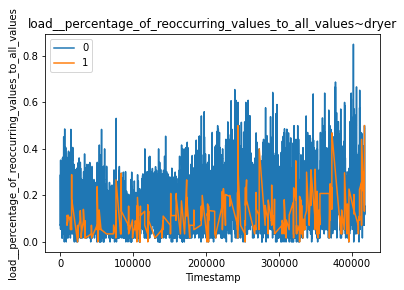

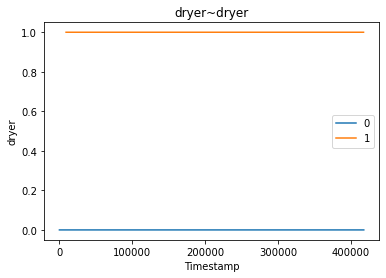

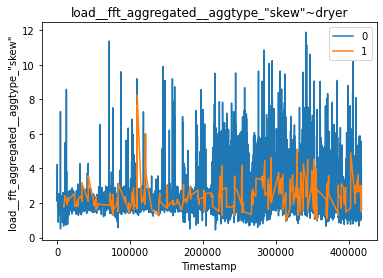

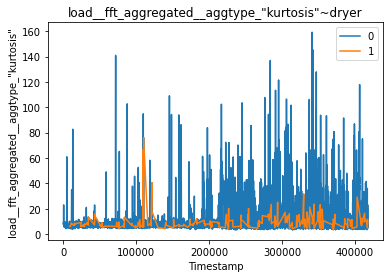

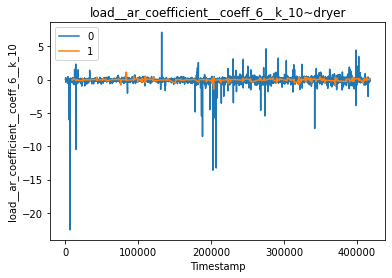

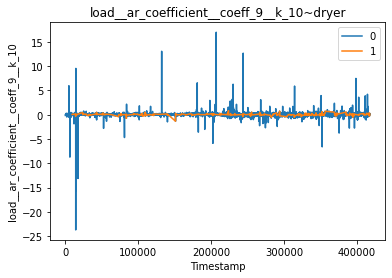

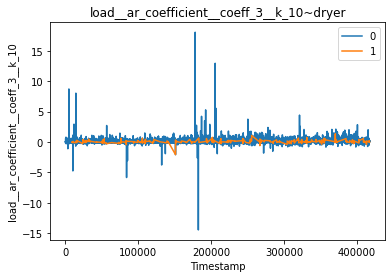

In [96]:
for i in range(filtered.shape[1]):
    plt.figure(i+1)
    PlotFeatureClass(filtered.columns[i],filtered,'dryer')

In [97]:
dryer = pd.concat([dryer, filtered], axis = 1)

dryerX = dryer[dryer.columns[dryer.columns!='dryer']]
# X is dryer data frame excluding the target variable 
dryerY = df['dryer']
# Y is the target variable
trainX, validX, trainY, validY = train_test_split(dryerX, dryerY,\
                                                 test_size = 0.4,\
                                                  shuffle=True)
# shuffle the dataset and split the feature & target data

In [98]:
columnNames['dryer'] = list(dryerX.columns)

## 4.4 Model 2: Random Forest with TS Features<a class="anchor" id="sec_4.4"></a> 

### 4.4.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_4.4.1"></a> 

In [99]:
dt = DecisionTreeClassifier()
# initialise decision tree model 

dt_grid ={'max_depth':[*range(2,19,3)],\
        'max_features':['sqrt', 'log2', None],\
         'splitter':['best','random']}
# possible hyperparameter candidates for grid search 

candidate_dt_ts, cv = HyperparametersSummary(dt, dt_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, sp

[CV] END .....max_depth=17, max_features=None, splitter=best; total time=   1.1s
[CV] END .....max_depth=17, max_features=None, splitter=best; total time=   1.2s
[CV] END .....max_depth=17, max_features=None, splitter=best; total time=   1.2s
[CV] END ...max_depth=17, max_features=None, splitter=random; total time=   0.2s
[CV] END ...max_depth=17, max_features=None, splitter=random; total time=   0.2s
[CV] END ...max_depth=17, max_features=None, splitter=random; total time=   0.2s


In [100]:
candidate_dt_ts.head(10)

max_depth max_features splitter  mean_fit_time  mean_test_score  \
34         17         None     best       1.140184         0.868936   
35         17         None   random       0.189611         0.827861   
28         14         None     best       1.088214         0.816587   
30         17         sqrt     best       0.356958         0.781932   
32         17         log2     best       0.329588         0.759146   
29         14         None   random       0.171396         0.697688   
26         14         log2     best       0.314104         0.678062   
24         14         sqrt     best       0.284832         0.676396   
22         11         None     best       0.954015         0.670494   
18         11         sqrt     best       0.249360         0.519358   

    std_test_score  
34        0.009609  
35        0.019758  
28        0.003592  
30        0.040682  
32        0.022957  
29        0.033509  
26        0.061616  
24        0.081153  
22        0.015927  
18        0.019292

In [101]:
best_parameters['dt_dryer_ts'] = {'max_depth':17,\
                                 'max_features':None,\
                                 'splitter':'best'}

### 4.4.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_4.4.2"></a>   

In [102]:
dt_dryer_ts = DecisionTreeClassifier(**best_parameters['dt_dryer_ts'])
dt_dryer_ts,_ = ModelFitting(dt_dryer_ts, trainX, trainY, validX, validY)

accuracy   0.993560279613138
recall     0.8512091563596086
precision  0.9446834665027658
fl         0.895513691979025


Feature  Importance
1                                                 max    0.151176
17                load__ar_coefficient__coeff_3__k_10    0.116265
12  load__percentage_of_reoccurring_values_to_all_...    0.098088
15                load__ar_coefficient__coeff_6__k_10    0.092945
14           load__fft_aggregated__aggtype_"kurtosis"    0.092098
16                load__ar_coefficient__coeff_9__k_10    0.090428
2                                           hourofday    0.087967
13               load__fft_aggregated__aggtype_"skew"    0.075306
10                                       scaled_hurst    0.059023
11                                     scaled_entropy    0.039900
4                                                 Tue    0.022787
3                                                 Mon    0.017191
0                                              absdif    0.014262
8                                                 Sat    0.010659
9                                                 Sun    0.009645
6                                                 Thu    0.009273
5                                                 Wed    0.007175
7                                                 Fri    0.005813

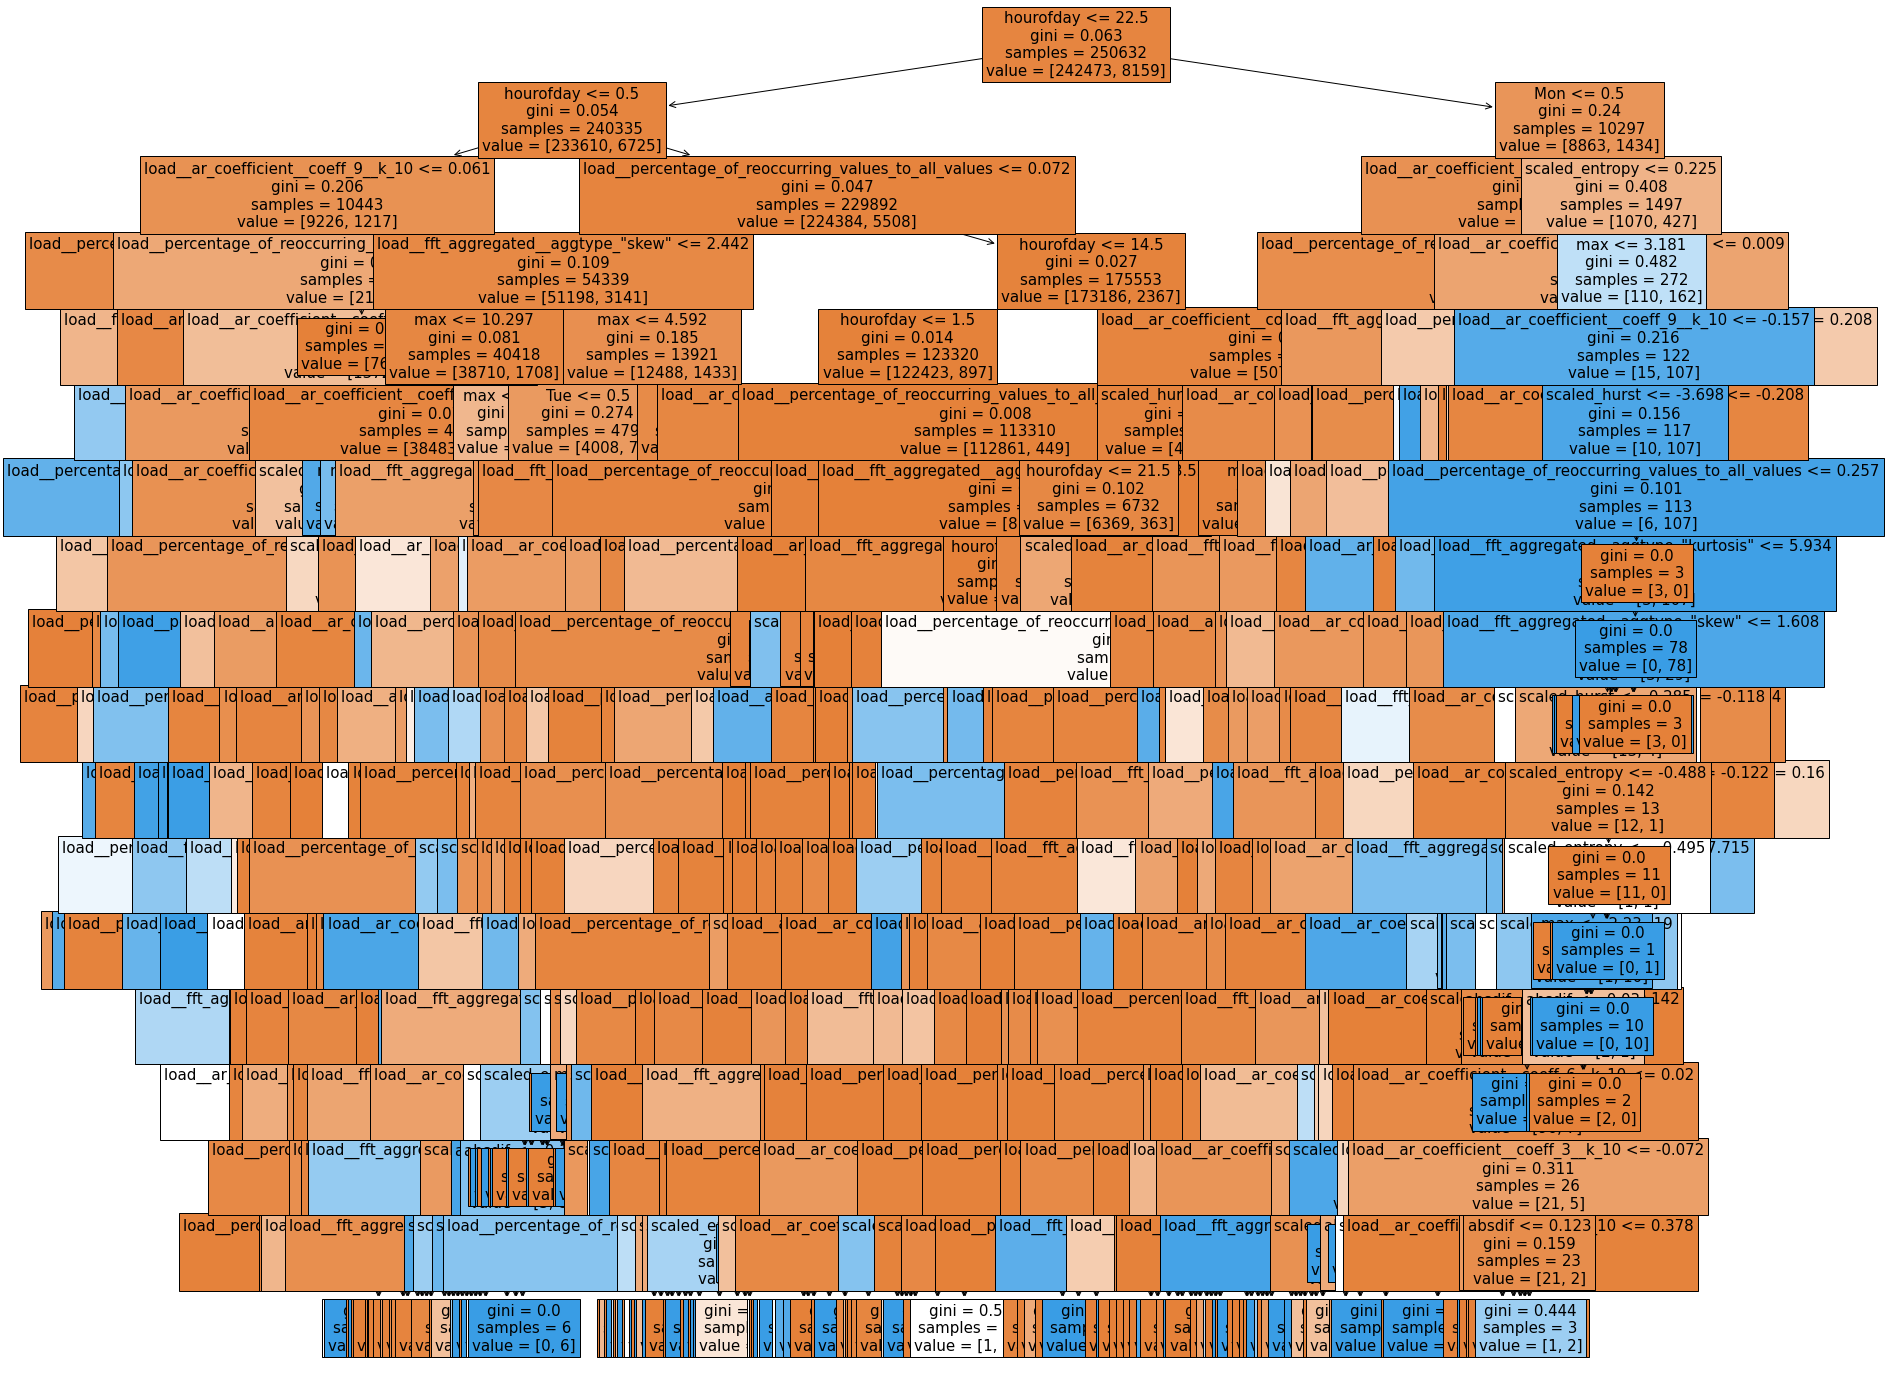

In [103]:
TreeFeatureImportance(dt_dryer_ts, trainX)

## 4.5 Model 3: Gradient Boosting Classifier with TS Features<a class="anchor" id="sec_4.5"></a> 

### 4.5.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_4.5.1"></a> 

In [104]:
gbt = GradientBoostingClassifier()
# initialise decision tree model 

gbt_grid ={'learning_rate':[i*0.1 for i in range(1,4,2)],\
          'max_depth':[*range(4,19,5)]}
# possible hyperparameter candidates for grid search 

candidate_gbt_ts, gbt_cv = HyperparametersSummary(gbt, gbt_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  37.1s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  37.3s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  37.2s
[CV] END .....................learning_rate=0.1, max_depth=9; total time= 1.5min
[CV] END .....................learning_rate=0.1, max_depth=9; total time= 1.5min
[CV] END .....................learning_rate=0.1, max_depth=9; total time= 1.4min
[CV] END ....................learning_rate=0.1, max_depth=14; total time= 2.4min
[CV] END ....................learning_rate=0.1, max_depth=14; total time= 2.5min
[CV] END ....................learning_rate=0.1, max_depth=14; total time= 2.5min
[CV] END .....learning_rate=0.30000000000000004, max_depth=4; total time=  36.8s
[CV] END .....learning_rate=0.30000000000000004, max_depth=4; total time=  39.1s
[CV] END .....learning_rate=0.30000000000000004, 

In [105]:
candidate_gbt_ts

learning_rate  max_depth  mean_fit_time  mean_test_score  std_test_score
5            0.3         14     151.832154         0.939641        0.001358
2            0.1         14     148.688043         0.933667        0.002539
4            0.3          9      83.004352         0.917691        0.004529
1            0.1          9      87.353370         0.917376        0.005236
3            0.3          4      38.412856         0.781797        0.014909
0            0.1          4      37.071989         0.416965        0.020132

In [106]:
best_parameters['gbt_dryer_ts'] = {'max_depth':14,\
                                  'learning_rate':0.3}

### 4.5.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_4.5.2"></a> 

In [107]:
gbt_dryer = GradientBoostingClassifier(**best_parameters['gbt_dryer_ts'])
gbt_dryer,_ = ModelFitting(gbt_dryer, trainX, trainY, validX, validY)

accuracy   0.9972768840371541
recall     0.9499723093963448
precision  0.9654784240150094
fl         0.9576626035172606


In [108]:
TreeFeatureImportance(gbt_dryer, trainX, graph = False)

Feature  Importance
1                                                 max    0.149542
17                load__ar_coefficient__coeff_3__k_10    0.104000
15                load__ar_coefficient__coeff_6__k_10    0.100725
16                load__ar_coefficient__coeff_9__k_10    0.094725
13               load__fft_aggregated__aggtype_"skew"    0.092385
12  load__percentage_of_reoccurring_values_to_all_...    0.084122
14           load__fft_aggregated__aggtype_"kurtosis"    0.082527
2                                           hourofday    0.081672
10                                       scaled_hurst    0.069832
11                                     scaled_entropy    0.045298
4                                                 Tue    0.021558
0                                              absdif    0.019824
3                                                 Mon    0.015745
8                                                 Sat    0.009643
6                                                 Thu    0.009561
9                                                 Sun    0.009216
5                                                 Wed    0.005557
7                                                 Fri    0.004069

## 4.6 Select the Best Model<a class="anchor" id="sec_4.6"></a> 

In [109]:
X = pd.concat([trainX, validX])
Y = pd.concat([trainY, validY])

ModelsCrossValidation([dt_dryer, gbt_dryer, dt_dryer_ts], \
                      X, Y, n_fold = 5)

DecisionTreeClassifier GradientBoostingClassifier  \
Fold 1                        0.5999                    0.96046   
Fold 2                      0.599012                   0.960103   
Fold 3                      0.601351                   0.958279   
Fold 4                      0.624664                    0.96151   
Fold 5                       0.61833                   0.959199   
Average                     0.608652                    0.95991   
Total CV Time             10.28298 s               1620.86268 s   

              DecisionTreeClassifier  
Fold 1                      0.902425  
Fold 2                      0.882569  
Fold 3                      0.891124  
Fold 4                      0.894163  
Fold 5                      0.890004  
Average                     0.892057  
Total CV Time          1632.630013 s

In [110]:
bestModels['dryer'] = gbt_dryer

# Part 5. Model Development: `wash`<a class="anchor" id="sec_5"></a>  
* [5.1 Feature Engineering](#sec_5.1)
* [5.2 Model 1: Decision Tree](#sec_5.2)
    * [5.2.1 Cross Validation for Hyperparameter Tuning](#sec_5.2.1)
    * [5.2.2 Model Fitting and Result Interpretation](#sec_5.2.2)
* [5.3 Extract Selected Timeseries Features using `tsfresh`](#sec_5.3)
* [5.4 Model 2: Random Forest with TS Features](#sec_5.4)
    * [5.4.1 Cross Validation for Hyperparameter Tuning](#sec_5.4.1)
    * [5.4.2 Model Fitting and Result Interpretation](#sec_5.4.2)
* [5.5 Model 3: Gradient Boosting Classifier with TS Features](#sec_5.5)
    * [5.5.1 Cross Validation for Hyperparameter Tuning](#sec_5.5.1)
    * [5.5.2 Model Fitting and Result Interpretation](#sec_5.5.2)
* [5.6 Select the Best Model](#sec_5.6)

For the target wash we have few of class 1 observations in comparison to other targets. Moreover, wash also had a low percentage of ‘standalone’ observations, observations that can solely be attributed to the use of one appliance. Based on these factors we expect relatively poor model performance in comparison to the other targets. 

Based on the EDA done before and the trial-and-error model testing process we used the features **hourofday**, **dayofweek**, **load**, **non-linear**, **max** to train the models for target AC. Moreover, using feature engineering we created the additional feature **entoropy scaled** as well as a set of timeseries features using the tsfresh library.
The models chosen for target AC are:

- Decision tree
- Random Forest using Time Series features
- Gradient Boosting Classifier with TS Features

After cross validating the models to tune hyperparameters we trained all models on the full data set. We then compared the final model’s performance using 5-fold cross-validation.

## 5.1 Feature Engineering<a class="anchor" id="sec_5.1"></a>  

In [111]:
wash = df[['load','nonlinear','max','hourofday']+dayofweek]
wash = StandardScaler_df(['entropy'], wash)

<ipython-input-36-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)


In [112]:
X = wash[wash.columns[wash.columns!='wash']]
# X is wash data frame excluding the target variable 
Y = df['wash']
# Y is the target variable
trainX, validX, trainY, validY = train_test_split(X, Y,\
                                                 test_size = 0.4,\
                                                  shuffle=True)

## 5.2 Model 1: Decision Tree<a class="anchor" id="sec_5.2"></a>  

### 5.2.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_5.2.1"></a>

In [113]:
dt = DecisionTreeClassifier()
# establish the DecisionTreeClassifer object

dt_grid ={'max_depth':[*range(2,12,2)],\
        'max_features':['sqrt', 'log2', None],\
         'splitter':['best','random']}
# possible hyperparameter candidates for cross validation 

candidates_dt_wash, cv_dt_wash = HyperparametersSummary(dt, dt_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=log2, spl

In [114]:
candidates_dt_wash.head(10)

max_depth max_features splitter  mean_fit_time  mean_test_score  \
28         10         None     best       0.545044         0.306699   
22          8         None     best       0.546413         0.151486   
24         10         sqrt     best       0.183575         0.129092   
26         10         log2     best       0.192956         0.119830   
29         10         None   random       0.085611         0.116685   
18          8         sqrt     best       0.138319         0.062061   
20          8         log2     best       0.165006         0.049828   
23          8         None   random       0.085714         0.031778   
16          6         None     best       0.405153         0.024339   
25         10         sqrt   random       0.053342         0.012908   

    std_test_score  
28        0.026452  
22        0.009422  
24        0.016455  
26        0.036945  
29        0.043235  
18        0.015812  
20        0.029141  
23        0.003922  
16        0.008787  
25        0.008858

In [115]:
best_parameters['dt_wash'] = {'max_depth':10,\
                             'max_features':None,\
                             'splitter':'best'}

### 5.2.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_5.2.2"></a>  

In [116]:
dt_wash = DecisionTreeClassifier(max_depth = 10, max_features = None, splitter = 'best')
dt_wash,_ = ModelFitting(dt_wash, trainX, trainY, validX, validY)

accuracy   0.9831765297328354
recall     0.19230769230769232
precision  0.7496977025392987
fl         0.3060972599358183


## 5.3 Extract Selected Timeseries Features using `tsfresh`<a class="anchor" id="sec_5.3"></a> 

In [117]:
features = ef(df[['load','hr']], column_id = 'hr', \
              default_fc_parameters = fc_params,\
             disable_progressbar=False)
# extract time series features based on window size of 60
# hourly features 
features.dropna(axis = 1, inplace = True)
# drop all the extracted features with NaN values
features['hr'] = features.index
merged_wash_hr = df[['hr','wash']].merge(features, on = 'hr')
filtered = sf(merged_wash_hr.drop('hr', axis = 1), np.asarray(merged_wash_hr['wash']))
# filter extracted features with no significance to the binary classification

Feature Extraction: 100%|██████████| 40/40 [00:04<00:00,  8.21it/s]


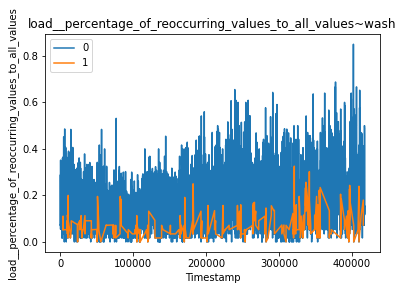

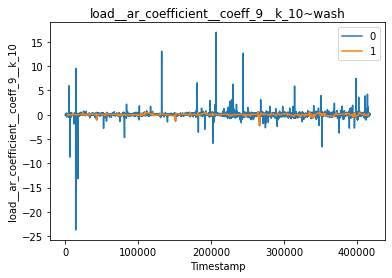

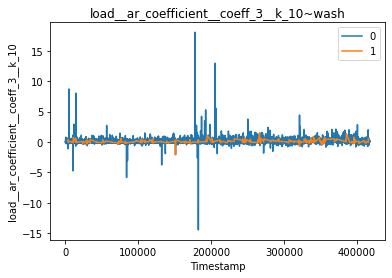

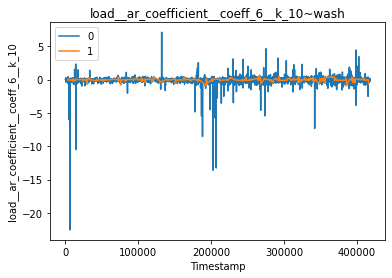

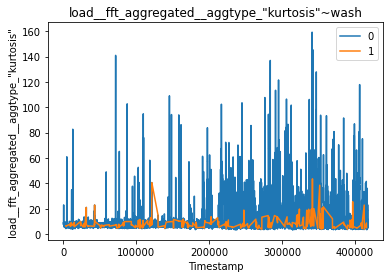

In [118]:
for i in range(filtered.shape[1]):
    if filtered.columns[i] == 'wash': continue 
    plt.figure(i+1)
    PlotFeatureClass(filtered.columns[i],filtered,'wash')

In [119]:
wash = pd.concat([wash, filtered.drop(['wash'],axis = 1)], axis = 1)
# drop the features that visually do not have significance to binary classification 
# drop the features that are already extracted using 30-min time window with the stepsize of 1

In [120]:
washX = wash.copy()
washY = df.wash
# Y is the target variable

trainX, validX, trainY, validY = train_test_split(washX, washY,\
                                                 test_size = 0.3,shuffle=True)

In [121]:
columnNames['wash'] = list(washX.columns)

## 5.4 Model 2: Random Forest with TS Features

### 5.4.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_5.4.1"></a>  

In [122]:
rf = RandomForestClassifier()
# configure RandomForestClassifier()

rf_grid ={'max_depth':[*range(6,washX.shape[1]+1,3)],\
        'max_features':['sqrt', 'log2']}
# hyperparmeters for tuning 
# the cross validation is performed using grid search on all parameter candidates

rf_wash_ts_candidates, rf_wash_ts_cv = HyperparametersSummary(rf, rf_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .....................max_depth=6, max_features=sqrt; total time=  13.0s
[CV] END .....................max_depth=6, max_features=sqrt; total time=  12.6s
[CV] END .....................max_depth=6, max_features=sqrt; total time=  13.2s
[CV] END .....................max_depth=6, max_features=log2; total time=  12.6s
[CV] END .....................max_depth=6, max_features=log2; total time=  11.4s
[CV] END .....................max_depth=6, max_features=log2; total time=  11.3s
[CV] END .....................max_depth=9, max_features=sqrt; total time=  15.0s
[CV] END .....................max_depth=9, max_features=sqrt; total time=  15.5s
[CV] END .....................max_depth=9, max_features=sqrt; total time=  15.7s
[CV] END .....................max_depth=9, max_features=log2; total time=  18.0s
[CV] END .....................max_depth=9, max_features=log2; total time=  17.1s
[CV] END .....................max_depth=9, max_fe

In [123]:
rf_wash_ts_candidates.head(10)

max_depth max_features  mean_fit_time  mean_test_score  std_test_score
6         15         sqrt      19.461450         0.695335        0.006036
7         15         log2      19.246876         0.694059        0.010445
5         12         log2      18.235612         0.507878        0.009417
4         12         sqrt      18.627723         0.503056        0.008315
2          9         sqrt      14.799541         0.118140        0.001181
3          9         log2      16.393567         0.108961        0.005085
0          6         sqrt      12.389349         0.010650        0.003003
1          6         log2      11.282626         0.009593        0.000002

In [124]:
best_parameters['rf_wash_ts'] = {'max_depth':15,\
                                'max_features':'sqrt'}

### 5.4.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_5.4.2"></a>  

In [125]:
# configure and fit the model with the best hyperparameters
rf_wash_ts = RandomForestClassifier(**best_parameters['rf_wash_ts'])
rf_wash_ts,_ = ModelFitting(rf_wash_ts,trainX, trainY, validX, validY)

accuracy   0.9912062306489196
recall     0.5984687367077839
precision  0.8990415335463259
fl         0.7185903983656791


In [126]:
TreeFeatureImportance(rf_wash_ts, trainX, graph = False)

Feature  Importance
0                                                load    0.124285
2                                                 max    0.116415
16           load__fft_aggregated__aggtype_"kurtosis"    0.101502
13                load__ar_coefficient__coeff_9__k_10    0.098784
14                load__ar_coefficient__coeff_3__k_10    0.093484
15                load__ar_coefficient__coeff_6__k_10    0.086362
12  load__percentage_of_reoccurring_values_to_all_...    0.086066
1                                           nonlinear    0.083776
11                                     scaled_entropy    0.079884
3                                           hourofday    0.073553
10                                                Sun    0.013313
5                                                 Tue    0.011392
4                                                 Mon    0.009859
6                                                 Wed    0.007582
9                                                 Sat    0.005542
7                                                 Thu    0.004354
8                                                 Fri    0.003847

## 5.5 Model 3: Gradient Boosting Classifier with TS Features<a class="anchor" id="sec_5.5"></a>

### 5.5.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_5.5.1"></a> 

In [201]:
gbt = GradientBoostingClassifier()
# initialise decision tree model 

gbt_grid ={'learning_rate':[i*0.1 for i in range(1,4,2)],\
          'max_depth':[*range(4,trainX.shape[1]+1,5)]}
# possible hyperparameter candidates for grid search 

candidate_gbt_ts, gbt_cv = HyperparametersSummary(gbt, gbt_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  46.8s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  49.3s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  46.5s
[CV] END .....................learning_rate=0.1, max_depth=9; total time= 1.6min
[CV] END .....................learning_rate=0.1, max_depth=9; total time= 1.4min
[CV] END .....................learning_rate=0.1, max_depth=9; total time= 1.4min
[CV] END ....................learning_rate=0.1, max_depth=14; total time= 2.5min
[CV] END ....................learning_rate=0.1, max_depth=14; total time= 2.4min
[CV] END ....................learning_rate=0.1, max_depth=14; total time= 2.5min
[CV] END .....learning_rate=0.30000000000000004, max_depth=4; total time=  40.4s
[CV] END .....learning_rate=0.30000000000000004, max_depth=4; total time=  39.9s
[CV] END .....learning_rate=0.30000000000000004, 

In [202]:
candidate_gbt_ts.head(10)

learning_rate  max_depth  mean_fit_time  mean_test_score  std_test_score
2            0.1         14     148.523076         0.800407        0.008410
5            0.3         14     149.335012         0.783033        0.008974
1            0.1          9      89.719827         0.778323        0.001047
4            0.3          9      87.571892         0.748628        0.007521
3            0.3          4      39.701490         0.575840        0.026449
0            0.1          4      47.353289         0.312291        0.024112

In [204]:
best_parameters['gbt_wash_ts'] = {'learning_rate':0.1,\
                                 'max_depth':14}

### 5.5.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_5.5.2"></a>   

In [205]:
# configure and fit the model with the best hyperparameters
gbt_wash_ts = GradientBoostingClassifier(**best_parameters['gbt_wash_ts'])
gbt_wash_ts,_ = ModelFitting(gbt_wash_ts,trainX, trainY, validX, validY)

accuracy   0.9937118963260877
recall     0.8051633723275514
precision  0.8674489352455454
fl         0.8351464435146444


In [206]:
TreeFeatureImportance(gbt_wash_ts, trainX, graph = False)

Feature  Importance
0                                                load    0.219563
1                                           nonlinear    0.129288
2                                                 max    0.111855
11                                     scaled_entropy    0.104747
13                load__ar_coefficient__coeff_9__k_10    0.077929
15                load__ar_coefficient__coeff_6__k_10    0.067756
16           load__fft_aggregated__aggtype_"kurtosis"    0.065840
14                load__ar_coefficient__coeff_3__k_10    0.064218
3                                           hourofday    0.055617
12  load__percentage_of_reoccurring_values_to_all_...    0.054036
10                                                Sun    0.012846
4                                                 Mon    0.010310
5                                                 Tue    0.009285
6                                                 Wed    0.005972
8                                                 Fri    0.004126
9                                                 Sat    0.003968
7                                                 Thu    0.002645

## 5.6 Select the Best Model<a class="anchor" id="sec_5.6"></a>   

In [213]:
X = pd.concat([trainX, validX])
Y = pd.concat([trainY, validY])

ModelsCrossValidation([dt_wash, rf_wash_ts,gbt_wash_ts], \
                      X, Y, n_fold = 5)

DecisionTreeClassifier RandomForestClassifier  \
Fold 1                      0.523077               0.734493   
Fold 2                      0.534645               0.723258   
Fold 3                      0.527044               0.724151   
Fold 4                      0.537325               0.733959   
Fold 5                      0.576104               0.733657   
Average                     0.539639               0.729904   
Total CV Time             8.831793 s           184.749475 s   

              GradientBoostingClassifier  
Fold 1                          0.849627  
Fold 2                            0.8389  
Fold 3                          0.840916  
Fold 4                          0.839754  
Fold 5                          0.843334  
Average                         0.842506  
Total CV Time              1511.920225 s

In [216]:
bestModels['wash'] = gbt_wash_ts

# Part 6. Model Development: ``EV``<a class="anchor" id="sec_6"></a>

* [6.1 Feature Engineering](#sec_6.1)
* [6.2 Model 1: Decision Tree](#sec_6.2)
    * [6.2.1 Cross Validation for Hyperparameter Tuning](#sec_6.2.1)
    * [6.2.2 Model Fitting and Result Interpretation](#sec_6.2.2)
* [6.3 Model 2: Random Forest](#sec_6.3)
    * [6.3.1 Cross Validation for Hyperparameter Tuning](#sec_6.3.1)
    * [6.3.2 Model Fitting and Result Interpretation](#sec_6.3.2)
* [6.4 Model 4: KNN Classifier](#sec_6.4)
    * [6.4.1 Cross Validation for Hyperparameter Tuning](#sec_6.4.1)
    * [6.4.2 Model Fitting and Result Interpretation](#sec_6.4.2)
* [6.4 Select the Best Model](#sec_6.6)

For the target EV we have few of class 1 observations in comparison to other targets. However, EV had a high percentage of *standalone* observations, observations that can solely be attributed to the use of one appliance. Based on these factors we uncertain what to expect in terms of model performance. 

Since the target EV has very few data points to train, we used all features in the training process. Moreover, using feature engineering we scaled all features. The models chosen for target AC are:

- Decision tree
- Random Forest
- KNN Classifier 

After cross validating the models to tune hyperparameters we trained all models on the full data set. We then compared the final model’s performance using 5-fold cross-validation.

## 6.1 Feature Engineering<a class="anchor" id="sec_6.1"></a>

In [217]:
ev = df[numericFeatures+dayofweek]
ev = StandardScaler_df(numericFeatures, ev)

<ipython-input-11-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)
<ipython-input-11-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'scaled_{feature}'] = standardScaler.fit_transform(feature_array)
<ipython-input-11-864047c6305a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [219]:
evX = ev[ev.columns[ev.columns!='ev']]
# X is dryer data frame excluding the target variable 
evY = df.ev
# Y is the target variable
trainX, validX, trainY, validY = train_test_split(evX, evY,\
                                                 test_size = 0.2,\
                                                  shuffle=True)

In [220]:
columnNames['ev'] = list(evX.columns)

## 6.2 Model 1: Decision Tree<a class="anchor" id="sec_6.2"></a>

### 6.2.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_6.2.1"></a>

In [226]:
dt = DecisionTreeClassifier()
# establish the DecisionTreeClassifer object

dt_grid ={'max_depth':[*range(2,evX.shape[1],4)],\
        'max_features':['sqrt', 'log2', None],\
         'splitter':['best','random']}
# possible hyperparameter candidates for cross validation 

ev_dt_candidates, ev_dt_results_array = HyperparametersSummary(dt, dt_grid, 5, \
                                                   trainX, trainY, top_n = 15)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.3s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.3s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.3s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.2s
[CV] END ......max_depth=2, max_features=sqrt, splitter=best; total time=   0.3s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, splitter=random; total time=   0.1s
[CV] END ......max_depth=2, max_features=log2, splitter=best; total time=   0.2s
[CV] END ......max_depth=2, max_features=log2, 

[CV] END .....max_depth=14, max_features=log2, splitter=best; total time=   0.7s
[CV] END .....max_depth=14, max_features=log2, splitter=best; total time=   0.6s
[CV] END .....max_depth=14, max_features=log2, splitter=best; total time=   0.7s
[CV] END .....max_depth=14, max_features=log2, splitter=best; total time=   0.7s
[CV] END ...max_depth=14, max_features=log2, splitter=random; total time=   0.2s
[CV] END ...max_depth=14, max_features=log2, splitter=random; total time=   0.1s
[CV] END ...max_depth=14, max_features=log2, splitter=random; total time=   0.2s
[CV] END ...max_depth=14, max_features=log2, splitter=random; total time=   0.2s
[CV] END ...max_depth=14, max_features=log2, splitter=random; total time=   0.1s
[CV] END .....max_depth=14, max_features=None, splitter=best; total time=   3.7s
[CV] END .....max_depth=14, max_features=None, splitter=best; total time=   4.2s
[CV] END .....max_depth=14, max_features=None, splitter=best; total time=   4.7s
[CV] END .....max_depth=14, 

In [229]:
ev_dt_candidates.head(15)

max_depth max_features splitter  mean_fit_time  mean_test_score  \
35         22         None   random       0.390069         0.887371   
29         18         None   random       0.407508         0.882558   
30         22         sqrt     best       0.781093         0.870352   
22         14         None     best       4.090420         0.862360   
28         18         None     best       3.802348         0.857976   
26         18         log2     best       0.712096         0.857745   
24         18         sqrt     best       0.939733         0.856056   
34         22         None     best       3.488048         0.855564   
33         22         log2   random       0.127938         0.852654   
32         22         log2     best       0.649501         0.851739   
23         14         None   random       0.436856         0.848194   
31         22         sqrt   random       0.139981         0.842047   
18         14         sqrt     best       0.999807         0.833373   
16         10         None     best       3.396072         0.829611   
20         14         log2     best       0.650815         0.816003   

    std_test_score  
35        0.015268  
29        0.017919  
30        0.012474  
22        0.009295  
28        0.016053  
26        0.025989  
24        0.013270  
34        0.013702  
33        0.019754  
32        0.009882  
23        0.017612  
31        0.033843  
18        0.018151  
16        0.015053  
20        0.029040

In [230]:
best_parameters['ev_dt'] = {'max_depth':14,\
                           'max_features':None,\
                           'splitter':'best'}

### 6.2.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_6.2.2"></a>

In [231]:
dt_ev = DecisionTreeClassifier(**best_parameters['ev_dt'])
dt_ev, _ = ModelFitting(dt_ev, trainX, trainY, validX, validY)

accuracy   0.9983481758115484
recall     0.8108695652173913
precision  0.8797169811320755
fl         0.8438914027149322


Feature  Importance
0               load    0.306850
21        scaled_var    0.083363
19     scaled_absdif    0.077203
1          hourofday    0.068958
20        scaled_max    0.055889
24      scaled_hurst    0.054416
16       scaled_load    0.050109
3             absdif    0.049706
17  scaled_hourofday    0.044104
4                max    0.039400
5                var    0.035838
8              hurst    0.033620
11               Wed    0.029729
23  scaled_nonlinear    0.018913
22    scaled_entropy    0.010664
6            entropy    0.008275
7          nonlinear    0.007718
13               Fri    0.006360
12               Thu    0.005011
9                Mon    0.004213
10               Tue    0.003993
18        scaled_dif    0.003020
2                dif    0.002625
15               Sun    0.000017
14               Sat    0.000004

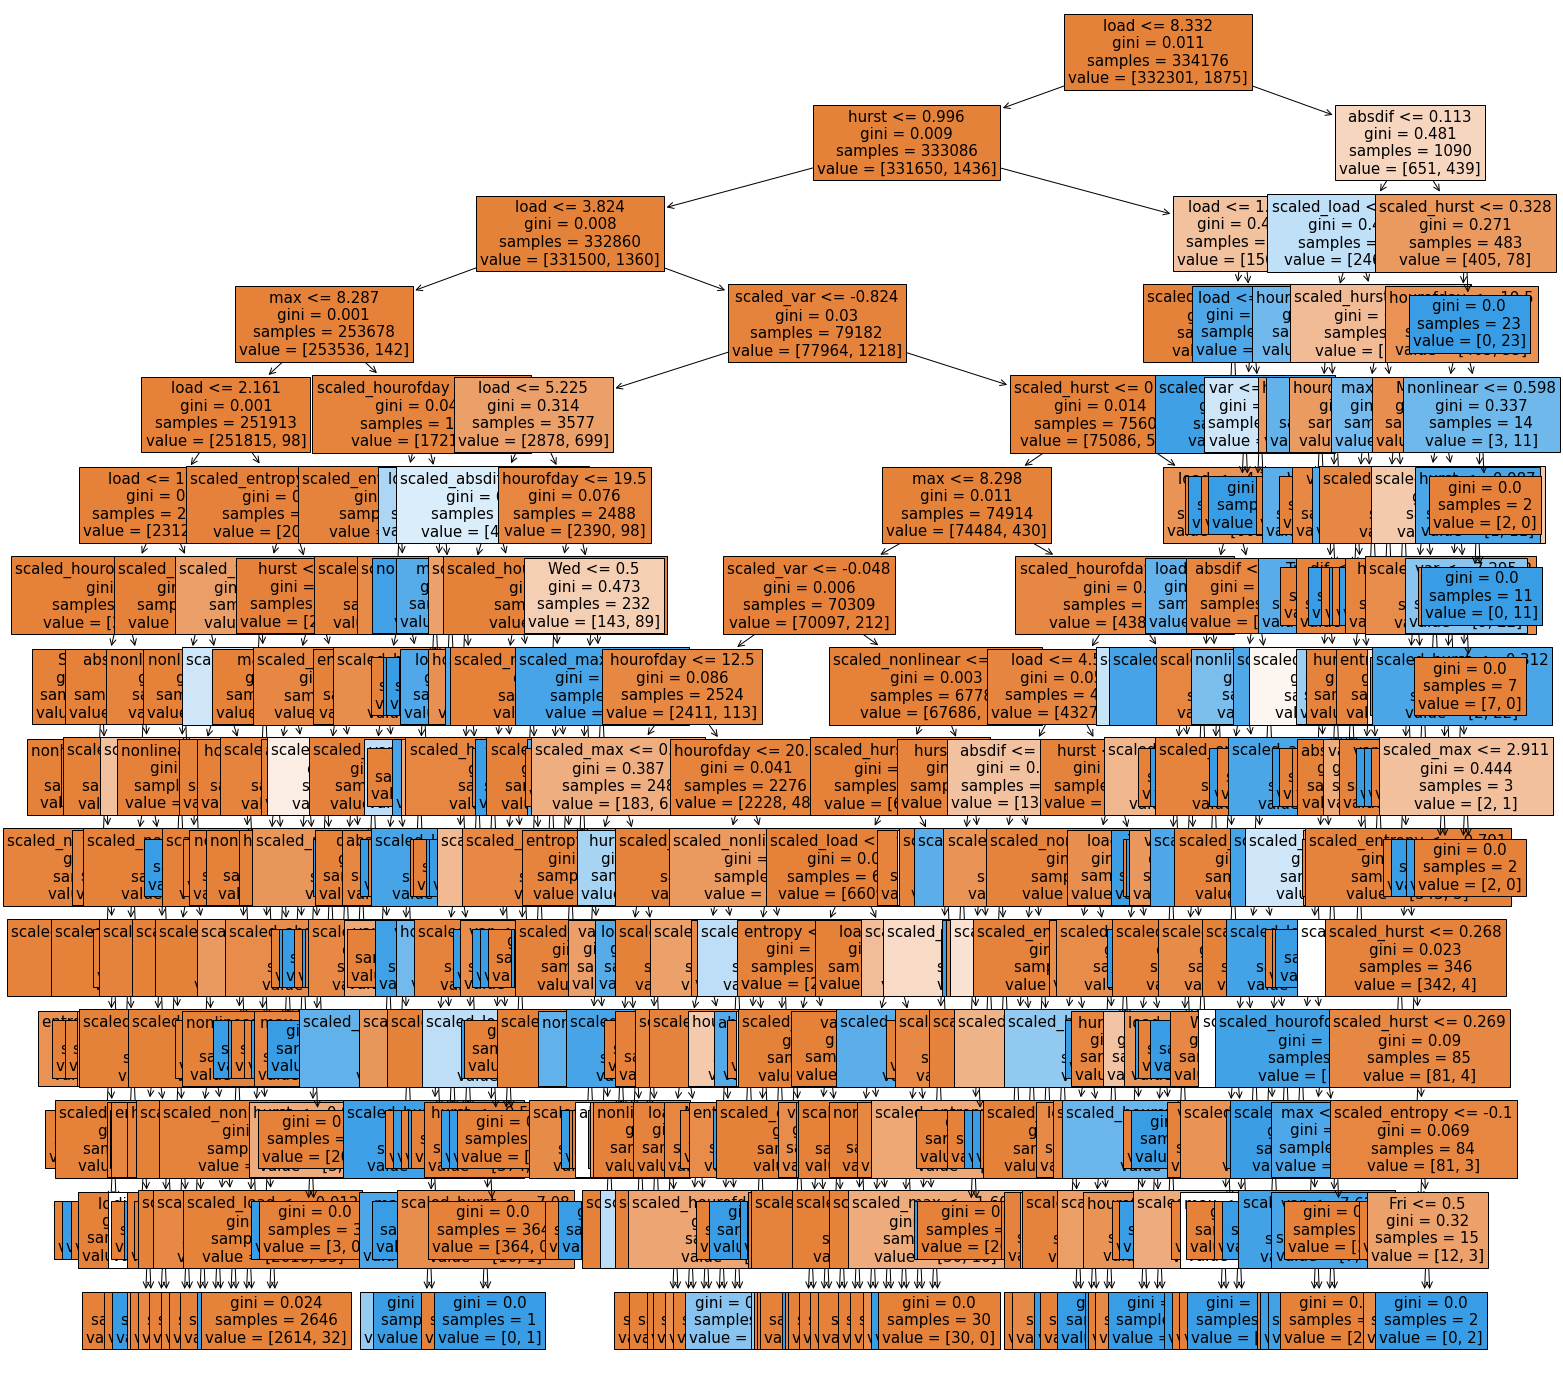

In [232]:
TreeFeatureImportance(dt_ev, trainX, graph = True)

## 6.3 Model 2: Random Forests<a class="anchor" id="sec_6.3"></a>

### 6.3.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_6.3.1"></a>

In [237]:
rf = RandomForestClassifier()
# configure RandomForestClassifier()

rf_grid ={'max_depth':[*range(5,evX.shape[1]+1,3)],\
        'max_features':['sqrt', 'log2']}
# hyperparmeters for tuning 
# the cross validation is performed using grid search on all parameter candidates

rf_ev_candidates, rf_ev_cv = HyperparametersSummary(rf, rf_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END .....................max_depth=5, max_features=sqrt; total time=  21.2s
[CV] END .....................max_depth=5, max_features=sqrt; total time=  22.1s
[CV] END .....................max_depth=5, max_features=sqrt; total time=  21.7s
[CV] END .....................max_depth=5, max_features=log2; total time=  17.7s
[CV] END .....................max_depth=5, max_features=log2; total time=  18.9s
[CV] END .....................max_depth=5, max_features=log2; total time=  17.4s
[CV] END .....................max_depth=8, max_features=sqrt; total time=  30.5s
[CV] END .....................max_depth=8, max_features=sqrt; total time=  31.4s
[CV] END .....................max_depth=8, max_features=sqrt; total time=  32.6s
[CV] END .....................max_depth=8, max_features=log2; total time=  27.8s
[CV] END .....................max_depth=8, max_features=log2; total time=  26.9s
[CV] END .....................max_depth=8, max_f

In [238]:
rf_ev_candidates.head(10)

max_depth max_features  mean_fit_time  mean_test_score  std_test_score
12         23         sqrt      44.838150         0.916817        0.011066
11         20         log2      36.464573         0.916393        0.010725
10         20         sqrt      39.100065         0.915677        0.013102
13         23         log2      37.034397         0.912830        0.009635
8          17         sqrt      44.646725         0.904468        0.012134
9          17         log2      30.291765         0.904216        0.012039
6          14         sqrt      43.968654         0.885764        0.011859
7          14         log2      35.322705         0.881492        0.010304
4          11         sqrt      38.014228         0.844350        0.010078
5          11         log2      32.687961         0.825268        0.006633

In [241]:
best_parameters['rf_ev'] = {'max_depth':20,\
                                'max_features':'log2'}

### 6.3.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_6.3.2"></a> 

In [242]:
# configure and fit the model with the best hyperparameters
rf_ev = RandomForestClassifier(**best_parameters['rf_ev'])
rf_ev,_ = ModelFitting(rf_ev,trainX, trainY, validX, validY)

accuracy   0.9990304510198219
recall     0.8326086956521739
precision  0.9896640826873385
fl         0.9043683589138135


In [243]:
TreeFeatureImportance(rf_ev, trainX, graph = False)

Feature  Importance
0               load    0.110300
16       scaled_load    0.108801
21        scaled_var    0.089931
5                var    0.086747
4                max    0.065342
20        scaled_max    0.065318
1          hourofday    0.059968
8              hurst    0.054936
24      scaled_hurst    0.053895
17  scaled_hourofday    0.047391
22    scaled_entropy    0.034359
6            entropy    0.034211
7          nonlinear    0.029755
23  scaled_nonlinear    0.026875
3             absdif    0.025070
19     scaled_absdif    0.024025
18        scaled_dif    0.017917
2                dif    0.015998
11               Wed    0.015706
13               Fri    0.007077
9                Mon    0.006549
10               Tue    0.005851
15               Sun    0.004902
14               Sat    0.004787
12               Thu    0.004288

## 6.4 Model 3: KNN Classifier<a class="anchor" id="sec_6.4"></a>  

### 6.4.1 Cross Validation for Hyperparameter Tuning<a class="anchor" id="sec_6.4.1"></a>  

In [234]:
knn_grid = {'n_neighbors': [*range(1,10,2)]}
knn = KNeighborsClassifier()

candidates, knn_cv = HyperparametersSummary(knn, knn_grid, 3, \
                                                   trainX, trainY, top_n = 15)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ......................................n_neighbors=1; total time= 4.5min
[CV] END ......................................n_neighbors=1; total time= 4.5min
[CV] END ......................................n_neighbors=1; total time= 4.5min
[CV] END ......................................n_neighbors=3; total time= 5.1min
[CV] END ......................................n_neighbors=3; total time= 5.0min
[CV] END ......................................n_neighbors=3; total time= 5.0min
[CV] END ......................................n_neighbors=5; total time= 6.1min
[CV] END ......................................n_neighbors=5; total time= 6.6min
[CV] END ......................................n_neighbors=5; total time= 6.7min
[CV] END ......................................n_neighbors=7; total time= 6.2min
[CV] END ......................................n_neighbors=7; total time= 6.6min
[CV] END ......................................n_

In [235]:
candidates

n_neighbors  mean_fit_time  mean_test_score  std_test_score
0            1       0.041100         0.924957        0.003339
1            3       0.040769         0.919153        0.010900
2            5       0.038781         0.899203        0.012822
3            7       0.042003         0.880200        0.018024
4            9       0.039488         0.864741        0.015605

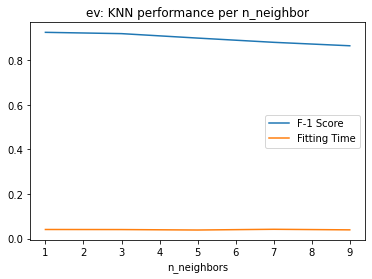

In [442]:
candidates.sort_values(['n_neighbors'], inplace = True)
plt.plot(candidates.n_neighbors, candidates.mean_test_score,\
        label = 'F-1 Score')
plt.plot(candidates.n_neighbors, candidates.mean_fit_time,\
        label = 'Fitting Time')
plt.title('ev: KNN performance per n_neighbor')
plt.xlabel('n_neighbors')
plt.legend()

In [127]:
1436/1875

0.7658666666666667

### 6.4.2 Model Fitting and Result Interpretation<a class="anchor" id="sec_6.4.2"></a>  

In [244]:
# configure and fit the model with the best hyperparameters
knn_ev = KNeighborsClassifier(n_neighbors = 3)
knn_ev, _ = ModelFitting(knn_ev, trainX, trainY, validX, validY)

accuracy   0.9991142392032941
recall     0.8782608695652174
precision  0.957345971563981
fl         0.9160997732426304


## 6.5 Select the Best Model<a class="anchor" id="sec_6.5"></a>  

In [245]:
X = pd.concat([trainX, validX])
Y = pd.concat([trainY, validY])

ModelsCrossValidation([dt_ev, rf_ev, knn_ev], \
                      X, Y, n_fold = 5)

DecisionTreeClassifier RandomForestClassifier  \
Fold 1                      0.877348               0.936508   
Fold 2                      0.887151               0.944758   
Fold 3                      0.880631               0.930445   
Fold 4                      0.878754               0.922722   
Fold 5                      0.855543               0.918108   
Average                     0.875885               0.930508   
Total CV Time            26.154133 s            347.71951 s   

              KNeighborsClassifier  
Fold 1                    0.933187  
Fold 2                     0.93495  
Fold 3                    0.937017  
Fold 4                    0.933628  
Fold 5                    0.917411  
Average                   0.931239  
Total CV Time        1969.314242 s

In [255]:
bestModels['ev'] = rf_ev

# Part 7. Predict Targets with Test Datasets<a class="anchor" id="sec_7"></a> 
* [Part 7. Predict Targets with Test Datasets](#sec_7)
    * [7.1 Inspect the Test set](#sec_7.1)
        * [7.1.1 Impute Missing Data Using Cosine Similarity](#sec_7.1.1)
    * [7.2 Feature Engineering](#sec_7.2)
        * [7.2.1 Convert Categorical Features to Binary Features](#sec_7.2.1)
        * [7.2.2 Scaling Using `StandardScaler()`](#sec_7.2.2)
        * [7.2.3 Extract Timeseries Features](#sec_7.2.3)
        * [7.2.4 Check if All Features are Extracted](#sec_7.2.4)
    * [7.3 Append Prediction to the Final Dataframe](#sec_7.3)
    
## 7.1 Inspect the Test set<a class="anchor" id="sec_7.1"></a>   

In [257]:
test = pd.read_csv('test_data_nolabels.csv').drop('Unnamed: 0', axis = 1)

In [258]:
test.head(35)

load  hourofday dayofweek    dif  absdif    max       var   entropy  \
0   1.869          0       Mon  0.000   0.000  0.000  0.000000  0.000000   
1   1.673          0       Mon -0.196   0.196  0.000  0.000000  0.000000   
2   1.660          0       Mon -0.013   0.013  0.000  0.000000  0.000000   
3   1.772          0       Mon  0.112   0.112  0.000  0.000000  0.000000   
4   1.679          0       Mon -0.093   0.093  0.000  0.000000  0.000000   
5   1.775          0       Mon  0.096   0.096  0.000  0.000000  0.000000   
6   1.759          0       Mon -0.016   0.016  0.000  0.000000  0.000000   
7   1.705          0       Mon -0.054   0.054  0.000  0.000000  0.000000   
8   1.829          0       Mon  0.124   0.124  0.000  0.000000  0.000000   
9   1.720          0       Mon -0.109   0.109  0.000  0.000000  0.000000   
10  1.676          0       Mon -0.044   0.044  0.000  0.000000  0.000000   
11  1.772          0       Mon  0.096   0.096  0.000  0.000000  0.000000   
12  1.646          0       Mon -0.126   0.126  0.000  0.000000  0.000000   
13  1.646          0       Mon  0.000   0.000  0.000  0.000000  0.000000   
14  3.033          0       Mon  1.387   1.387  0.000  0.000000  0.000000   
15  2.942          0       Mon -0.091   0.091  0.000  0.000000  0.000000   
16  2.940          0       Mon -0.002   0.002  0.000  0.000000  0.000000   
17  3.063          0       Mon  0.123   0.123  0.000  0.000000  0.000000   
18  2.837          0       Mon -0.226   0.226  0.000  0.000000  0.000000   
19  2.896          0       Mon  0.059   0.059  0.000  0.000000  0.000000   
20  2.875          0       Mon -0.021   0.021  0.000  0.000000  0.000000   
21  2.823          0       Mon -0.052   0.052  0.000  0.000000  0.000000   
22  2.949          0       Mon  0.126   0.126  0.000  0.000000  0.000000   
23  2.841          0       Mon -0.108   0.108  0.000  0.000000  0.000000   
24  2.726          0       Mon -0.115   0.115  0.000  0.000000  0.000000   
25  2.759          0       Mon  0.033   0.033  0.000  0.000000  0.000000   
26  2.892          0       Mon  0.133   0.133  0.000  0.000000  0.000000   
27  2.902          0       Mon  0.010   0.010  0.000  0.000000  0.000000   
28  3.057          0       Mon  0.155   0.155  0.000  0.000000  0.000000   
29  2.969          0       Mon -0.088   0.088  0.000  0.000000  0.000000   
30  2.994          0       Mon  0.025   0.025  3.148  0.440228  0.696209   
31  3.027          0       Mon  0.033   0.033  3.148  0.445975  0.696830   
32  3.028          0       Mon  0.001   0.001  3.148  0.444053  0.687740   
33  3.030          0       Mon  0.002   0.002  3.148  0.443543  0.674241   
34  3.148          0       Mon  0.118   0.118  3.148  0.445122  0.664238   

    nonlinear     hurst  
0    0.000000  0.000000  
1    0.000000  0.000000  
2    0.000000  0.000000  
3    0.000000  0.000000  
4    0.000000  0.000000  
5    0.000000  0.000000  
6    0.000000  0.000000  
7    0.000000  0.000000  
8    0.000000  0.000000  
9    0.000000  0.000000  
10   0.000000  0.000000  
11   0.000000  0.000000  
12   0.000000  0.000000  
13   0.000000  0.000000  
14   0.000000  0.000000  
15   0.000000  0.000000  
16   0.000000  0.000000  
17   0.000000  0.000000  
18   0.000000  0.000000  
19   0.000000  0.000000  
20   0.000000  0.000000  
21   0.000000  0.000000  
22   0.000000  0.000000  
23   0.000000  0.000000  
24   0.000000  0.000000  
25   0.000000  0.000000  
26   0.000000  0.000000  
27   0.000000  0.000000  
28   0.000000  0.000000  
29   0.000000  0.000000  
30   0.440910  0.991823  
31   0.387177  0.991948  
32   0.383363  0.991830  
33   0.412186  0.991822  
34   0.390511  0.991800

### 7.1.1 Impute Missing Data Using Cosine Similarity<a class="anchor" id="sec_7.1.1"></a>  

In [259]:
featuresWithNaN = ['max','var','entropy','nonlinear','hurst']
# the names of the features with missing values 

In [389]:
trainLoadCandidates = df['load'][(df.hourofday == 0)&(df.Mon == 1)]
# load variable from the train set with the same hourofday and dayofweek

In [309]:
testNaN = np.asarray(test.loc[0:29,'load'].tolist())
# convert the 'load' variable in test set with missing values into nparray

In [312]:
from numpy import dot
from numpy.linalg import norm

In [321]:
cos = []
# empty array to store the row index array and cosine similarity 

for i in range(trainLoadCandidates.shape[0]): 
# looping through the load variables from train set 
    temp = dict()
    # dictionary for the similarity and the row index array
    
    if i*30+30 > trainLoadCandidates.shape[0]: break
    # if the index is beyond the candidate rows, stop 
    
    candidate = np.asarray(trainLoadCandidates[i*30:i*30+30].tolist())
    # 30 rows of load from trainLoadCandidates
    # convert into numpy array for cosine similarity calculation

    similarity = dot(testNaN, candidate)/(norm(testNaN)*norm(candidate))
    # calculate the cosine similarity between two numpy arrays 
    temp['similarity'] = similarity
    temp['array'] = [i*30, i*30+30]
    # store the array of the rows from trainLoadCandidates 
    
    cos.append(temp)

In [325]:
pd.DataFrame(cos).sort_values('similarity', ascending = False).head(10)
# the arrays with the most similar load from the test rows with missing 
# data is the ones to use for imputation 

similarity         array
76    0.987761  [2280, 2310]
64    0.979647  [1920, 1950]
38    0.979422  [1140, 1170]
47    0.977245  [1410, 1440]
62    0.975351  [1860, 1890]
54    0.973311  [1620, 1650]
63    0.972201  [1890, 1920]
68    0.971489  [2040, 2070]
59    0.970467  [1770, 1800]
37    0.968874  [1110, 1140]

In [400]:
for i in featuresWithNaN: 
    test.loc[:29, i] = df.loc[trainLoadCandidates[2280:2310].index,i].astype('float').tolist()
    # impute the missing values with the most similar rows

## 7.2 Feature Engineering<a class="anchor" id="sec_7.2"></a>
### 7.2.1 Convert Categorical Features to Binary Features<a class="anchor" id="sec_7.2.1"></a>

In [358]:
test_df = test.copy()
# copy the test 
test_df = pd.concat([test_df.drop('dayofweek', axis = 1),\
                    pd.get_dummies(test_df.dayofweek)], axis = 1)
# use get_dummies to convert categorical variables to binary variables 
# drop the original variable and concatenate the newly generated features 

In [359]:
test_df.head(5)

load  hourofday    dif  absdif   max       var   entropy  nonlinear  \
0  1.869          0  0.000   0.000  6.75  4.186321  0.668765   0.547121   
1  1.673          0 -0.196   0.196  6.75  4.179318  0.666518   0.542546   
2  1.660          0 -0.013   0.013  6.75  4.171662  0.656825   0.534587   
3  1.772          0  0.112   0.112  6.75  4.164386  0.644567   0.527546   
4  1.679          0 -0.093   0.093  6.75  4.159810  0.638451   0.517071   

      hurst  Fri  Mon  Sat  Sun  Thu  Tue  Wed  
0  0.992909    0    1    0    0    0    0    0  
1  0.992902    0    1    0    0    0    0    0  
2  0.992893    0    1    0    0    0    0    0  
3  0.992883    0    1    0    0    0    0    0  
4  0.992874    0    1    0    0    0    0    0

### 7.2.2 Scaling Using `StandardScaler()`<a class="anchor" id="sec_7.2.2"></a>   

In [365]:
test_df = StandardScaler_df(numericFeatures, test_df, test)
# use StandardScaler_df scale all the numerical features
# all dummy variables from the first part are concatenated to the newly-
# genearted variables
test_df.head()

load  hourofday    dif  absdif   max       var   entropy  nonlinear  \
0  1.869          0  0.000   0.000  6.75  4.186321  0.668765   0.547121   
1  1.673          0 -0.196   0.196  6.75  4.179318  0.666518   0.542546   
2  1.660          0 -0.013   0.013  6.75  4.171662  0.656825   0.534587   
3  1.772          0  0.112   0.112  6.75  4.164386  0.644567   0.527546   
4  1.679          0 -0.093   0.093  6.75  4.159810  0.638451   0.517071   

      hurst  Fri  ...  Wed  scaled_load  scaled_hourofday  scaled_dif  \
0  0.992909    0  ...    0     0.119726         -1.661588    0.000014   
1  0.992902    0  ...    0    -0.040759         -1.661588   -0.487052   
2  0.992893    0  ...    0    -0.051403         -1.661588   -0.032291   
3  0.992883    0  ...    0     0.040302         -1.661588    0.278338   
4  0.992874    0  ...    0    -0.035846         -1.661588   -0.231094   

   scaled_absdif  scaled_max  scaled_var  scaled_entropy  scaled_nonlinear  \
0      -0.281122    1.846442    2.479879       -0.538574         -0.349899   
1       0.224825    1.846442    2.474617       -0.561052         -0.351530   
2      -0.247564    1.846442    2.468864       -0.658054         -0.354368   
3       0.007991    1.846442    2.463397       -0.780714         -0.356878   
4      -0.041055    1.846442    2.459958       -0.841914         -0.360613   

   scaled_hurst  
0      0.345419  
1      0.345311  
2      0.345180  
3      0.345035  
4      0.344904  

[5 rows x 25 columns]

### 7.2.3 Extract Timeseries Features<a class="anchor" id="sec_7.2.3"></a>

In [366]:
hr_id = [*range(1,20000)]
hr = np.repeat(hr_id, 60)[:test.shape[0]]
test_df['hr'] = hr

In [367]:
minimalFeatures = ef(test_df[['load','hr']], column_id = 'hr', \
              default_fc_parameters = settings)
# extract time series features based on window size of 60, step by 60
# hourly features 
minimalFeatures.dropna(axis = 1, inplace = True)
# drop all the extracted features with NaN values
minimalFeatures['hr'] = minimalFeatures.index

Feature Extraction: 100%|██████████| 40/40 [00:03<00:00, 10.64it/s]


In [368]:
selectedFeatures = ef(test_df[['load','hr']], column_id = 'hr', \
              default_fc_parameters = fc_params)
# extract time series features based on window size of 60, step by 60
# hourly features 
selectedFeatures.dropna(axis = 1, inplace = True)
# drop all the extracted features with NaN values
selectedFeatures['hr'] = selectedFeatures.index

Feature Extraction: 100%|██████████| 40/40 [00:02<00:00, 15.56it/s]


In [369]:
tsFeatures = minimalFeatures.merge(selectedFeatures, on = 'hr')
# join the two timeseries features dataframes using 'hr'
test_df = test_df.merge(tsFeatures, on = 'hr')
# append all the newly-generated timeseries features to the test set

In [370]:
test_df.head()

load  hourofday    dif  absdif   max       var   entropy  nonlinear  \
0  1.869          0  0.000   0.000  6.75  4.186321  0.668765   0.547121   
1  1.673          0 -0.196   0.196  6.75  4.179318  0.666518   0.542546   
2  1.660          0 -0.013   0.013  6.75  4.171662  0.656825   0.534587   
3  1.772          0  0.112   0.112  6.75  4.164386  0.644567   0.527546   
4  1.679          0 -0.093   0.093  6.75  4.159810  0.638451   0.517071   

      hurst  Fri  ...  load__variance  load__root_mean_square  load__maximum  \
0  0.992909    0  ...        0.430023                2.470633          3.148   
1  0.992902    0  ...        0.430023                2.470633          3.148   
2  0.992893    0  ...        0.430023                2.470633          3.148   
3  0.992883    0  ...        0.430023                2.470633          3.148   
4  0.992874    0  ...        0.430023                2.470633          3.148   

   load__minimum  load__ar_coefficient__coeff_6__k_10  \
0          1.526                             0.028613   
1          1.526                             0.028613   
2          1.526                             0.028613   
3          1.526                             0.028613   
4          1.526                             0.028613   

   load__ar_coefficient__coeff_3__k_10  load__ar_coefficient__coeff_9__k_10  \
0                             0.143443                            -0.137394   
1                             0.143443                            -0.137394   
2                             0.143443                            -0.137394   
3                             0.143443                            -0.137394   
4                             0.143443                            -0.137394   

   load__percentage_of_reoccurring_values_to_all_values  \
0                                           0.052632      
1                                           0.052632      
2                                           0.052632      
3                                           0.052632      
4                                           0.052632      

   load__fft_aggregated__aggtype_"skew"  \
0                              2.617875   
1                              2.617875   
2                              2.617875   
3                              2.617875   
4                              2.617875   

   load__fft_aggregated__aggtype_"kurtosis"  
0                                  9.230482  
1                                  9.230482  
2                                  9.230482  
3                                  9.230482  
4                                  9.230482  

[5 rows x 41 columns]

### 7.2.4 Check if All Features are Extracted<a class="anchor" id="sec_7.2.4"></a>  

In [371]:
test_df.columns

Index(['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy',
       'nonlinear', 'hurst', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'scaled_load', 'scaled_hourofday', 'scaled_dif', 'scaled_absdif',
       'scaled_max', 'scaled_var', 'scaled_entropy', 'scaled_nonlinear',
       'scaled_hurst', 'hr', 'load__sum_values', 'load__median', 'load__mean',
       'load__length', 'load__standard_deviation', 'load__variance',
       'load__root_mean_square', 'load__maximum', 'load__minimum',
       'load__ar_coefficient__coeff_6__k_10',
       'load__ar_coefficient__coeff_3__k_10',
       'load__ar_coefficient__coeff_9__k_10',
       'load__percentage_of_reoccurring_values_to_all_values',
       'load__fft_aggregated__aggtype_"skew"',
       'load__fft_aggregated__aggtype_"kurtosis"'],
      dtype='object')

In [377]:
allColumnsNeeded = set([i for lst in columnNames.values() for i in lst])
# the columns used for each model 

for i in test_df.columns: 
# if test_df does not have the columns needed for predicting each target
    if i not in allColumnsNeeded: 
        print(i)

hr
load__length
load__standard_deviation
load__variance
load__maximum
load__minimum


## 7.3 Append Prediction to the Final Dataframe<a class="anchor" id="sec_7.3"></a> 

In [378]:
testPrediction = pd.DataFrame(index = [*range(test.shape[0])],\
                         columns = ['id']+targets)
# create an empty dataframe
# row number is the same as the test set 
# column names are the target names
# add ID column

In [385]:
testPrediction['id'] = testPrediction.index+1
# ID of each observation is 1 added by each of the index number of the df

In [386]:
for i in targets:
# for each target
    test_i = test_df[columnNames[i]]
    # obtain the test set for the target prediction
    model_i = bestModels[i]
    # retrieve the best model saved for the prediction
    testPrediction[i] = model_i.predict(test_i)
    # predict the target and append it to the testPrediction dataframe
    print(i)
    print(testPrediction[i].value_counts())
    # check if the predictions are legitimate
    print('\n')

ac
0    96023
1     9517
Name: ac, dtype: int64


oven
0    104094
1      1446
Name: oven, dtype: int64


ev
0    105466
1        74
Name: ev, dtype: int64


dryer
0    105043
1       497
Name: dryer, dtype: int64


wash
0    105249
1       291
Name: wash, dtype: int64




In [387]:
testPrediction.head()

id  ac  oven  ev  dryer  wash
0   1   0     0   0      0     0
1   2   0     0   0      0     0
2   3   0     0   0      0     0
3   4   0     0   0      0     0
4   5   0     0   0      0     0

In [388]:
testPrediction.to_csv('predict_label.csv', index = False)